In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

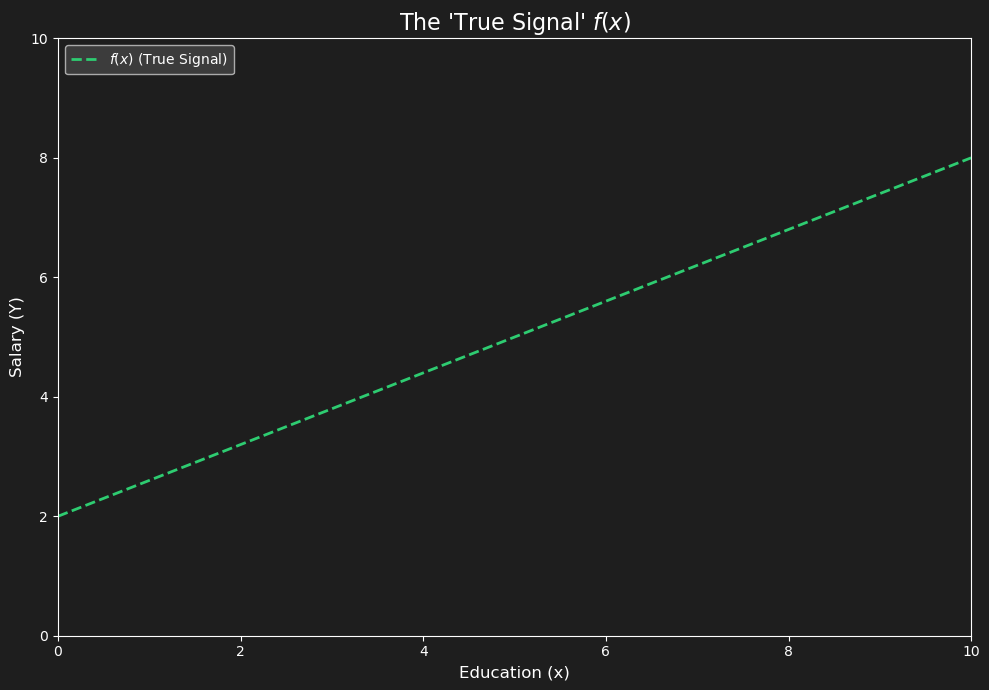

In [34]:
# --- 1. Define Core Functions ---
# f(x) is the "hidden" true signal.
def f(x):
    return 0.6 * x + 2

# f_hat(x) is our "line of fit" model.
def f_hat(x):
    return 0.58 * x + 2.1

# --- 2. Generate ALL our data (so it's consistent) ---
np.random.seed(42) # Use a seed for reproducibility!
x_data = np.random.uniform(0.5, 9.5, 30)
epsilon_data = np.random.normal(0, 0.8, 30)
y_data = f(x_data) + epsilon_data # This is the "real" Y

# --- 3. Setup Plot 1: The "True Signal" ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Education (x)", color='white', fontsize=12)
ax.set_ylabel("Salary (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("The 'True Signal' $f(x)$", color='white', fontsize=16)

# --- 4. Plot the "True Signal" ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Signal)')

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

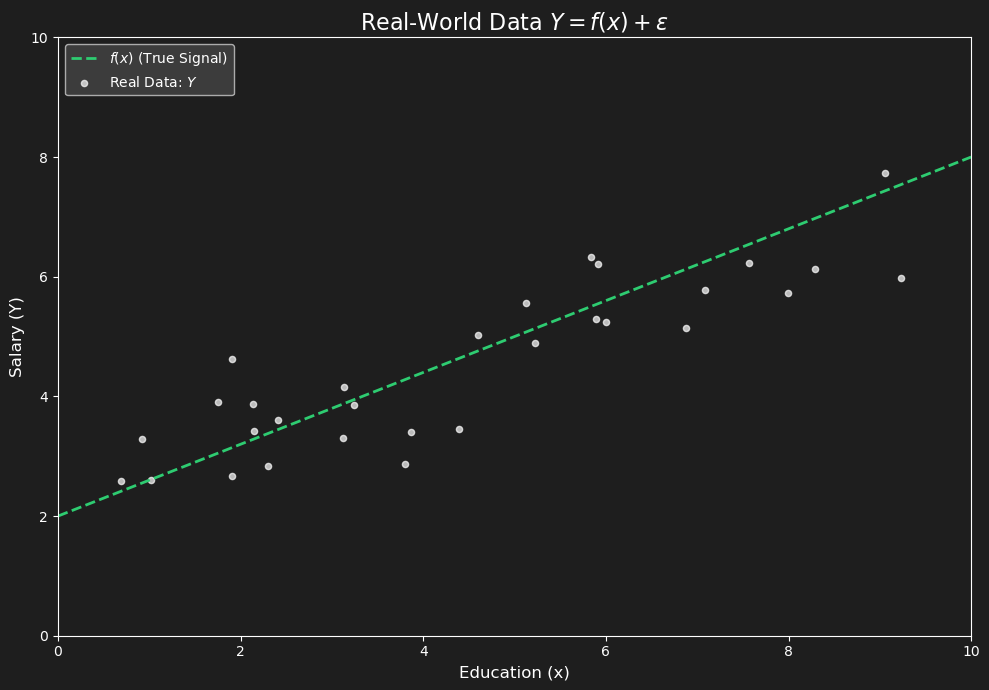

In [35]:
# --- Setup Plot 2: The "Real World" Data ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Education (x)", color='white', fontsize=12)
ax.set_ylabel("Salary (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("Real-World Data $Y = f(x) + \\epsilon$", color='white', fontsize=16)

# --- Plot the "True Signal" (for reference) ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Signal)')

# --- Plot the "Real Data" (NEW) ---
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=20, label='Real Data: $Y$')

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

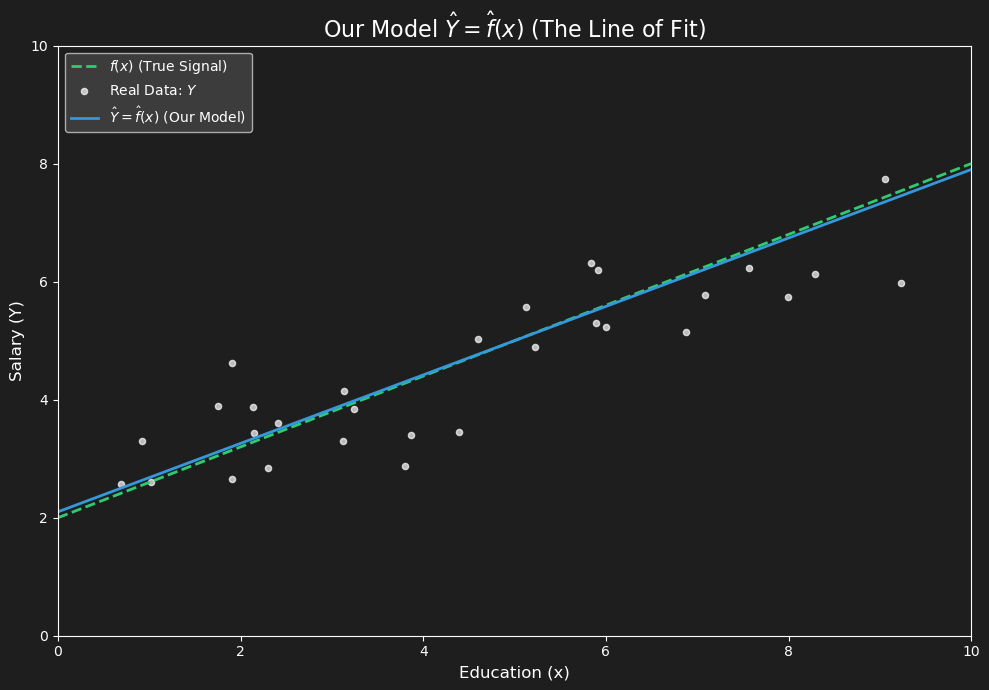

In [36]:
# --- Setup Plot 3: Our "Model" ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Education (x)", color='white', fontsize=12)
ax.set_ylabel("Salary (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("Our Model $\\hat{Y} = \\hat{f}(x)$ (The Line of Fit)", color='white', fontsize=16)

# --- Plot the "True Signal" (for reference) ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Signal)')

# --- Plot the "Real Data" ---
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=20, label='Real Data: $Y$')

# --- Plot our "Model" (NEW) ---
ax.plot(x_vals, f_hat(x_vals), color='#3498DB', linestyle='-', linewidth=2, label='$\\hat{Y} = \\hat{f}(x)$ (Our Model)')


ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

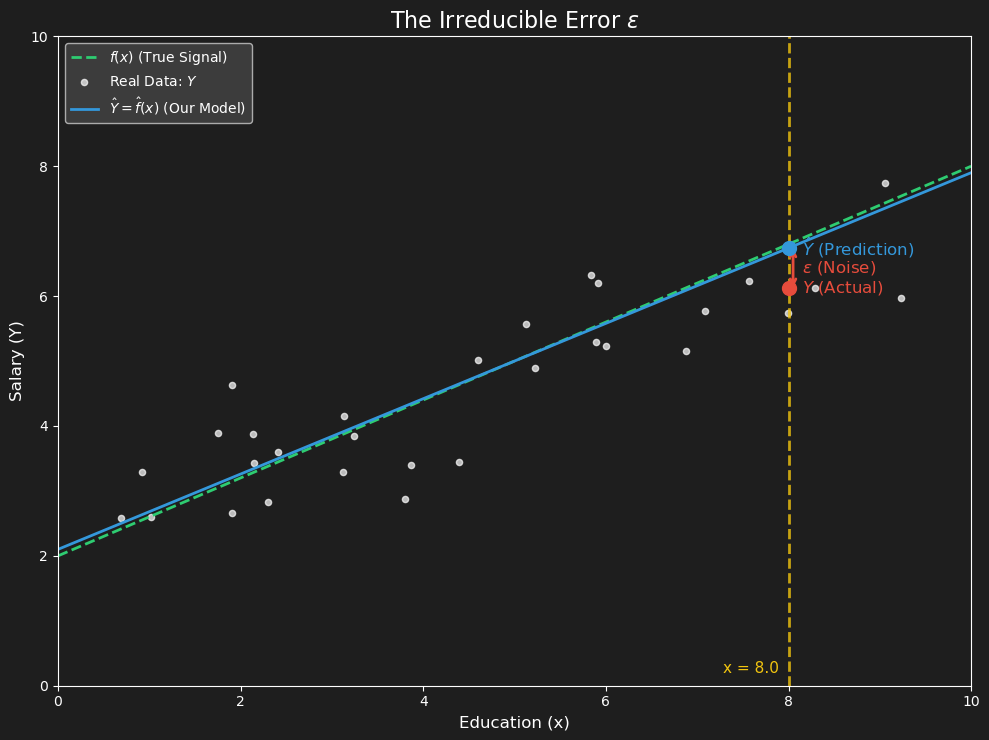

In [37]:
# --- Setup Plot 4: The "Snapshot" ---
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Education (x)", color='white', fontsize=12)
ax.set_ylabel("Salary (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("The Irreducible Error $\\epsilon$", color='white', fontsize=16)

# --- Plot all previous elements ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Signal)')
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=20, label='Real Data: $Y$')
ax.plot(x_vals, f_hat(x_vals), color='#3498DB', linestyle='-', linewidth=2, label='$\\hat{Y} = \\hat{f}(x)$ (Our Model)')
ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)

# --- Plot the "Snapshot" at a single 'stop' (NEW) ---
x_snapshot = 8.0

# Vertical "Slider" Line
ax.axvline(x=x_snapshot, color='#F1C40F', linestyle='--', linewidth=2, alpha=0.8)
ax.text(x_snapshot - 0.1, 0.2, f'x = {x_snapshot}', color='#F1C40F', ha='right', fontsize=11)

# Model's Prediction
y_model = f_hat(x_snapshot)
ax.plot([x_snapshot], [y_model], 'o', color='#3498DB', markersize=10, zorder=5)
ax.text(x_snapshot + 0.15, y_model, r"$\hat{Y}$ (Prediction)", color='#3498DB', va='center', fontsize=12)

# "Actual" Stochastic Outcome (one random sample)
# We use one of our *actual* data points for the "real" epsilon
y_actual = f(x_snapshot) + np.random.normal(0, 0.8) # New random sample
ax.plot([x_snapshot], [y_actual], 'o', color='#E74C3C', markersize=10, zorder=5)
ax.text(x_snapshot + 0.15, y_actual, r"$Y$ (Actual)", color='#E74C3C', va='center', fontsize=12)

# Epsilon Arrow & Label
ax.annotate(
    "",
    xy=(x_snapshot + 0.05, y_actual), # Arrow head
    xytext=(x_snapshot + 0.05, y_model), # Arrow tail
    arrowprops=dict(arrowstyle='<->', color='#E74C3C', shrinkA=0.1, shrinkB=0.1, linewidth=2)
)
ax.text(x_snapshot + 0.15, (y_model + y_actual) / 2, r"$\epsilon$ (Noise)", color='#E74C3C', va='center', ha='left', fontsize=12)

# Final Conclusion Text
# ax.text(2.5, 0.8, r"$\mathbb{E}[\hat{Y}]$", color='#3498DB', fontsize=20, ha='center', va='center')
# ax.text(3.4, 0.8, r"$\neq$", color='white', fontsize=20, ha='center', va='center')
# ax.text(4.2, 0.8, r"$Y$", color='#E74C3C', fontsize=20, ha='center', va='center')

plt.tight_layout()
plt.show()

## Non-Linear f(x)

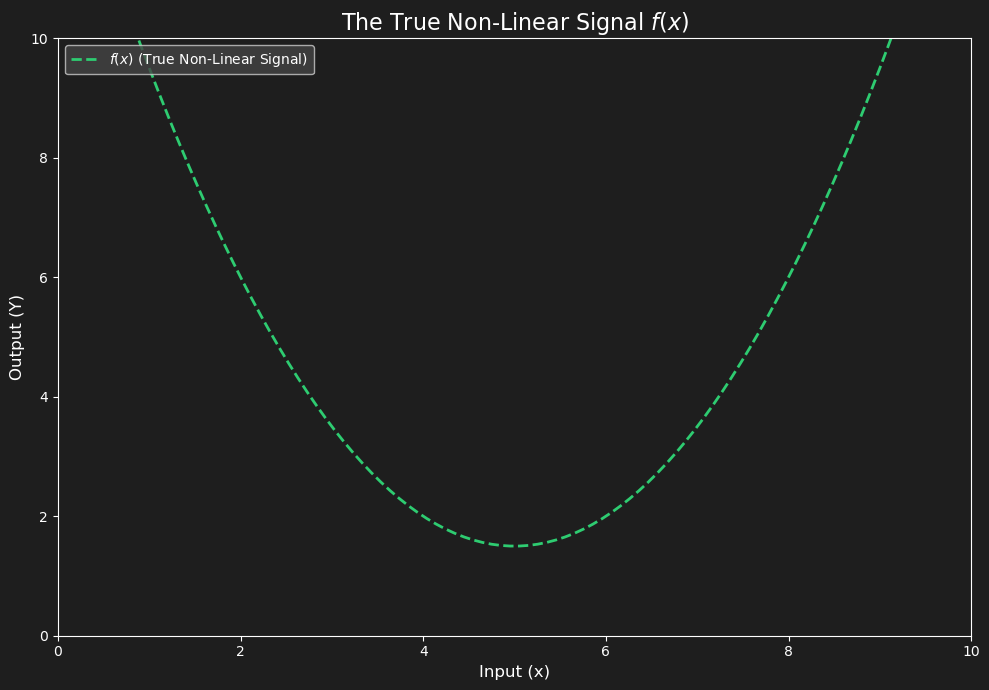

In [38]:
# --- 1. Define Core Functions ---
# f(x) is the "hidden" TRUE NON-LINEAR signal (quadratic)
def f_nonlinear(x):
    return 0.5 * (x - 5)**2 + 1.5 # A parabola, shifted and scaled

# f_hat(x) is our "line of fit" model (LINEAR)
def f_linear_estimate(x):
    # This linear estimate will try its best to fit the curve
    # I've chosen parameters that roughly fit the middle, but poorly at ends
    return 0.5 * x + 2.5

# --- 2. Generate ALL our data (so it's consistent) ---
np.random.seed(43) # Use a different seed for this series
x_data_nonlinear = np.random.uniform(0.5, 9.5, 30)
epsilon_data_nonlinear = np.random.normal(0, 0.8, 30) # Same noise level
y_data_nonlinear = f_nonlinear(x_data_nonlinear) + epsilon_data_nonlinear

# --- 3. Setup Plot 1: The Non-Linear "True Signal" ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Input (x)", color='white', fontsize=12)
ax.set_ylabel("Output (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("The True Non-Linear Signal $f(x)$", color='white', fontsize=16)

# --- 4. Plot the Non-Linear "True Signal" ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f_nonlinear(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Non-Linear Signal)')

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

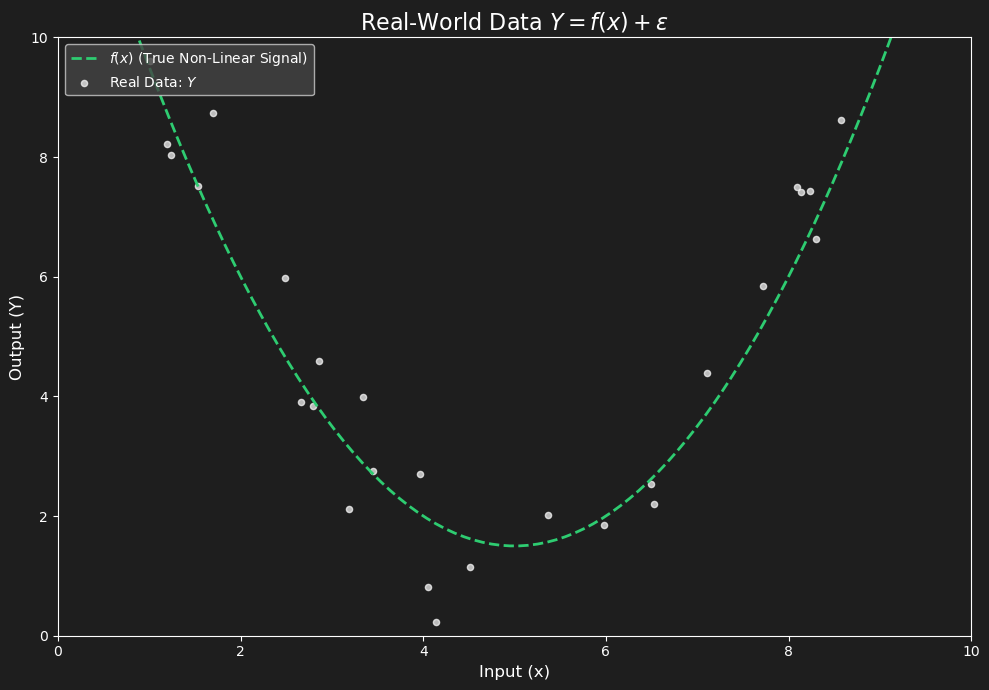

In [39]:
# --- Setup Plot 2: Noisy Data for Non-Linear Signal ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Input (x)", color='white', fontsize=12)
ax.set_ylabel("Output (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("Real-World Data $Y = f(x) + \\epsilon$", color='white', fontsize=16)

# --- Plot the Non-Linear "True Signal" (for reference) ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f_nonlinear(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Non-Linear Signal)')

# --- Plot the "Real Data" ---
ax.scatter(x_data_nonlinear, y_data_nonlinear, color='white', alpha=0.7, s=20, label='Real Data: $Y$')

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

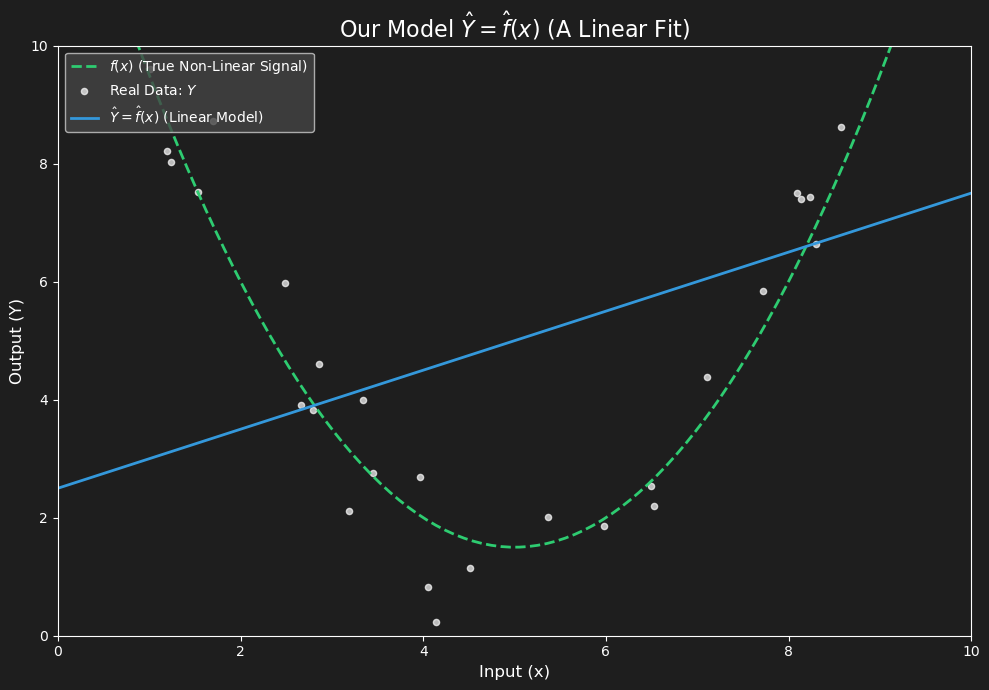

In [40]:
# --- Setup Plot 3: Our Poor Linear Model ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Input (x)", color='white', fontsize=12)
ax.set_ylabel("Output (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("Our Model $\\hat{Y} = \\hat{f}(x)$ (A Linear Fit)", color='white', fontsize=16)

# --- Plot the Non-Linear "True Signal" (for reference) ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f_nonlinear(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Non-Linear Signal)')

# --- Plot the "Real Data" ---
ax.scatter(x_data_nonlinear, y_data_nonlinear, color='white', alpha=0.7, s=20, label='Real Data: $Y$')

# --- Plot our "Poor Linear Model" (NEW) ---
ax.plot(x_vals, f_linear_estimate(x_vals), color='#3498DB', linestyle='-', linewidth=2, label='$\\hat{Y} = \\hat{f}(x)$ (Linear Model)')

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

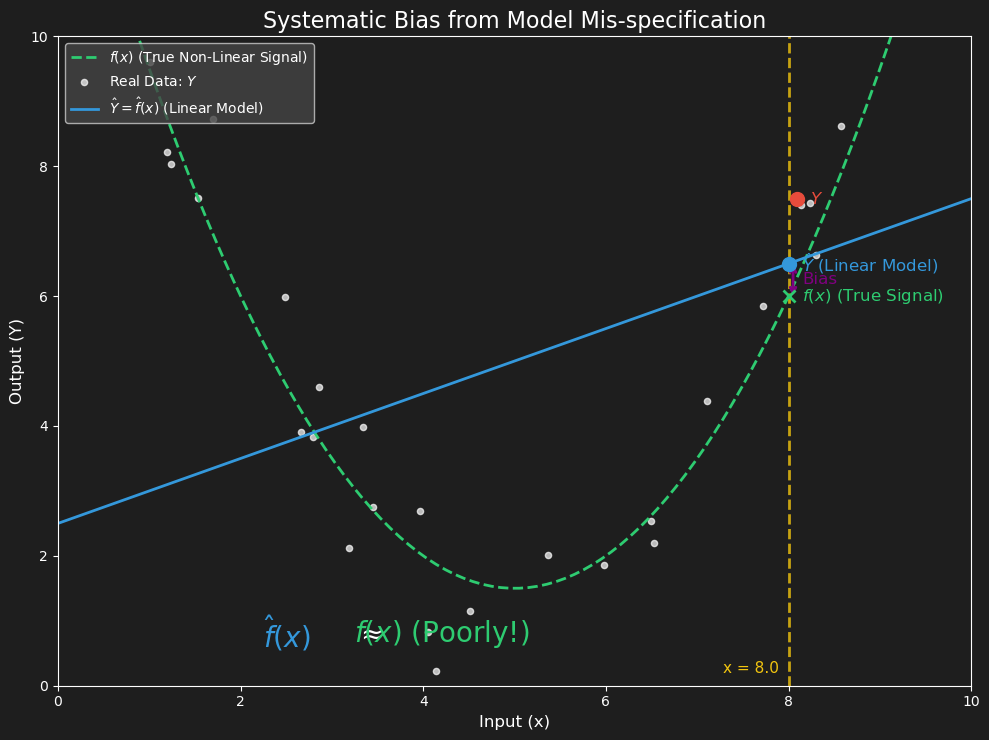

In [41]:
# --- Setup Plot 4: The Final Snapshot with Bias ---
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Input (x)", color='white', fontsize=12)
ax.set_ylabel("Output (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("Systematic Bias from Model Mis-specification", color='white', fontsize=16)

# --- Plot all previous elements ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f_nonlinear(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Non-Linear Signal)')
ax.scatter(x_data_nonlinear, y_data_nonlinear, color='white', alpha=0.7, s=20, label='Real Data: $Y$')
ax.plot(x_vals, f_linear_estimate(x_vals), color='#3498DB', linestyle='-', linewidth=2, label='$\\hat{Y} = \\hat{f}(x)$ (Linear Model)')
ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)


# --- Plot the "Snapshot" at a single 'stop' (NEW) ---
x_snapshot = 8.0 # Example point to highlight error

# Vertical "Slider" Line
ax.axvline(x=x_snapshot, color='#F1C40F', linestyle='--', linewidth=2, alpha=0.8)
ax.text(x_snapshot - 0.1, 0.2, f'x = {x_snapshot}', color='#F1C40F', ha='right', fontsize=11)

# Model's Prediction
y_model_pred = f_linear_estimate(x_snapshot)
ax.plot([x_snapshot], [y_model_pred], 'o', color='#3498DB', markersize=10, zorder=5)
ax.text(x_snapshot + 0.15, y_model_pred, r"$\hat{Y}$ (Linear Model)", color='#3498DB', va='center', fontsize=12)

# True Signal Point
y_true_signal = f_nonlinear(x_snapshot)
ax.plot([x_snapshot], [y_true_signal], 'x', color='#2ECC71', markersize=8, markeredgewidth=2, zorder=5) # Mark true signal with 'x'
ax.text(x_snapshot + 0.15, y_true_signal, r"$f(x)$ (True Signal)", color='#2ECC71', va='center', fontsize=12)


# --- Illustrate Bias ---
ax.annotate(
    "",
    xy=(x_snapshot + 0.05, y_true_signal), # Arrow head
    xytext=(x_snapshot + 0.05, y_model_pred), # Arrow tail
    arrowprops=dict(arrowstyle='<->', color='purple', shrinkA=0.1, shrinkB=0.1, linewidth=2)
)
ax.text(x_snapshot + 0.15, (y_model_pred + y_true_signal) / 2, r"Bias", color='purple', va='center', ha='left', fontsize=12)


# --- Illustrate one example of total error for a data point ---
# For a specific data point near x_snapshot, to show actual Y
closest_data_idx = np.argmin(np.abs(x_data_nonlinear - x_snapshot))
x_actual_data = x_data_nonlinear[closest_data_idx]
y_actual_data = y_data_nonlinear[closest_data_idx]

# Plot the actual data point
ax.plot([x_actual_data], [y_actual_data], 'o', color='#E74C3C', markersize=10, zorder=5)
ax.text(x_actual_data + 0.15, y_actual_data, r"$Y$", color='#E74C3C', va='center', fontsize=12)


# --- Final Conclusion Text ---
ax.text(2.5, 0.8, r"$\hat{f}(x)$", color='#3498DB', fontsize=20, ha='center', va='center')
ax.text(3.4, 0.8, r"$\approx$", color='white', fontsize=20, ha='center', va='center')
ax.text(4.2, 0.8, r"$f(x)$ (Poorly!)", color='#2ECC71', fontsize=20, ha='center', va='center')


plt.tight_layout()
plt.show()

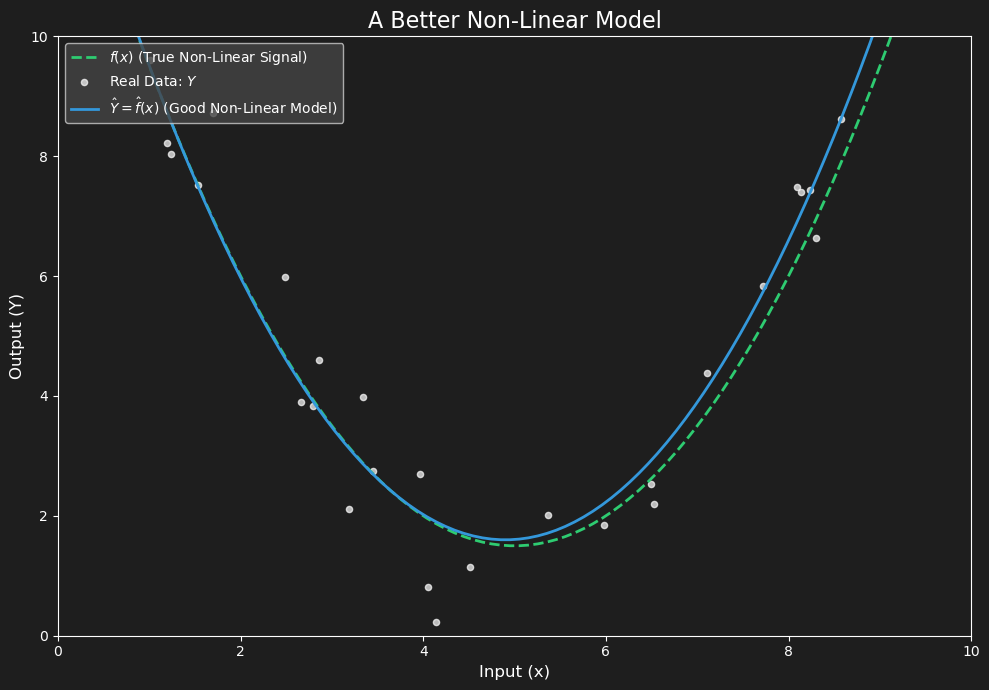

In [42]:
# --- 1. Define Core Functions ---
# f(x) is the "hidden" TRUE NON-LINEAR signal
def f_nonlinear(x):
    return 0.5 * (x - 5)**2 + 1.5

# f_hat(x) is our NEW "GOOD" non-linear model
# It's also a parabola, showing it has "learned" the correct shape
def f_good_estimate(x):
    return 0.52 * (x - 4.9)**2 + 1.6 # Very close to the true f(x)

# --- 2. Generate ALL our data (so it's consistent) ---
np.random.seed(43) # Use the same seed as the previous non-linear example
x_data_nonlinear = np.random.uniform(0.5, 9.5, 30)
epsilon_data_nonlinear = np.random.normal(0, 0.8, 30) # Same noise level
y_data_nonlinear = f_nonlinear(x_data_nonlinear) + epsilon_data_nonlinear

# --- 3. Setup Plot 3: A "Good" Non-Linear Model ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Input (x)", color='white', fontsize=12)
ax.set_ylabel("Output (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("A Better Non-Linear Model", color='white', fontsize=16)

# --- Plot the Non-Linear "True Signal" (for reference) ---
x_vals = np.linspace(0, 10, 100)
ax.plot(x_vals, f_nonlinear(x_vals), color='#2ECC71', linestyle='--', linewidth=2, label='$f(x)$ (True Non-Linear Signal)')

# --- Plot the "Real Data" ---
ax.scatter(x_data_nonlinear, y_data_nonlinear, color='white', alpha=0.7, s=20, label='Real Data: $Y$')

# --- Plot our "Good Non-Linear Model" (NEW) ---
ax.plot(x_vals, f_good_estimate(x_vals), color='#3498DB', linestyle='-', linewidth=2, label='$\\hat{Y} = \\hat{f}(x)$ (Good Non-Linear Model)')

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

Image saved to linear_function_equation_transparent.png


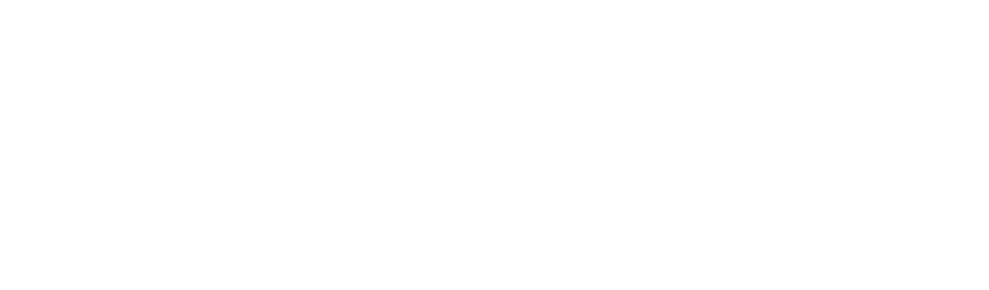

In [46]:
# Define the LaTeX string
latex_equation = r'$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p$'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Add the text to the axes
ax.text(0.5, 0.5, latex_equation,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=24,
        color='white')

# Turn off the axes
ax.axis('off')

# Set the figure background to be transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with a transparent background
file_name = 'linear_function_equation_transparent.png'
plt.savefig(file_name, transparent=True, dpi=300)

print(f"Image saved to {file_name}")

Image saved to general_form.png


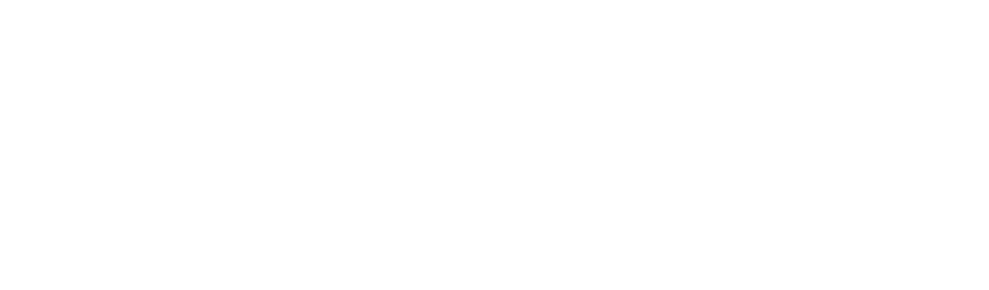

In [48]:
# Define the LaTeX string
latex_equation = r'$Y=f(x)+\epsilon$'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Add the text to the axes
ax.text(0.5, 0.5, latex_equation,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=24,
        color='white')

# Turn off the axes
ax.axis('off')

# Set the figure background to be transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with a transparent background
file_name = 'general_form.png'
plt.savefig(file_name, transparent=True, dpi=500)

print(f"Image saved to {file_name}")

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

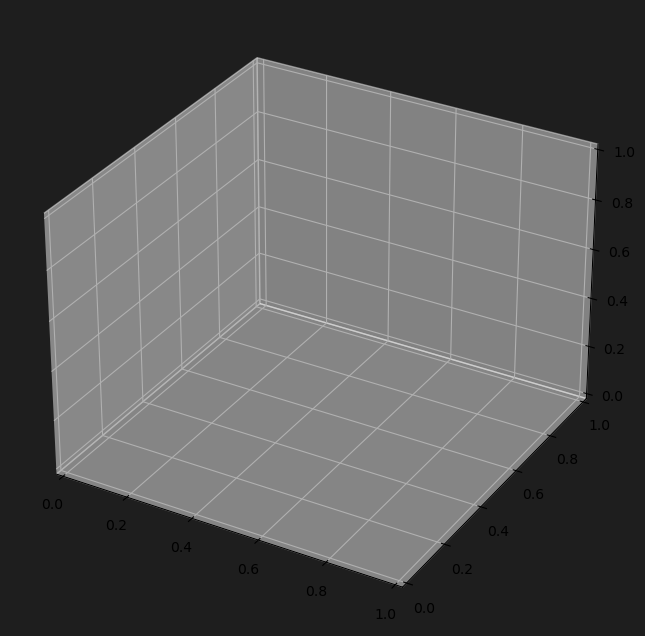

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Generate sample data (same as before)
np.random.seed(42)  # for reproducibility
num_points = 100
years_of_education = np.random.randint(10, 23, num_points)
seniority = np.random.randint(0, 31, num_points)
base_income = 40000
education_bonus = years_of_education * 1500
seniority_bonus = seniority * 700
noise = np.random.normal(0, 8000, num_points)
income = base_income + education_bonus + seniority_bonus + noise

# 2. Define the colors
bg_color = '#1e1e1e'       # The dark background color
text_color = 'white'      # Color for text (labels, title, ticks)
point_color = 'cyan'      # Bright color for the data points
grid_color = '#888888'    # A light gray for the gridlines

# 3. Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Set background colors
# Set background color for the figure
fig.patch.set_facecolor(bg_color)

# Set background color for the axes patch
ax.set_facecolor(bg_color)

# Set the 3D axis "panes" (the "walls" of the plot)
# We convert the hex color to an RGB tuple (values 0-1)
pane_color_rgb = (30/255, 30/255, 30/255, 1.0) # #1e1e1e
ax.w_xaxis.set_pane_color(pane_color_rgb)
ax.w_yaxis.set_pane_color(pane_color_rgb)
ax.w_zaxis.set_pane_color(pane_color_rgb)

# 5. Create the scatter plot
ax.scatter(years_of_education, income, seniority, c=point_color, marker='o')

# 6. Set labels and title with the light text color
ax.set_xlabel('Years of Education', color=text_color, labelpad=10)
ax.set_ylabel('Income', color=text_color, labelpad=10)
ax.set_zlabel('Seniority', color=text_color, labelpad=10)
ax.set_title('3D Scatter Plot: Income, Education, and Seniority', color=text_color, pad=20)

# 7. Set the color of the tick labels
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
ax.tick_params(axis='z', colors=text_color)

# 8. Set the color of the axis lines (spines)
ax.w_xaxis.line.set_color(text_color)
ax.w_yaxis.line.set_color(text_color)
ax.w_zaxis.line.set_color(text_color)

# 9. Set gridline colors
ax.grid(color=grid_color, linestyle=':', linewidth=1, alpha=0.6)

# Adjust layout
plt.tight_layout()

# 10. Save the figure
file_name = '3d_scatter_plot_dark.png'
# We specify facecolor in savefig to ensure the saved image has the bg
plt.savefig(file_name, facecolor=bg_color)

print(f"3D scatter plot saved to {file_name}")

Plot saved as 'parametric_vs_nonparametric_dark.png'


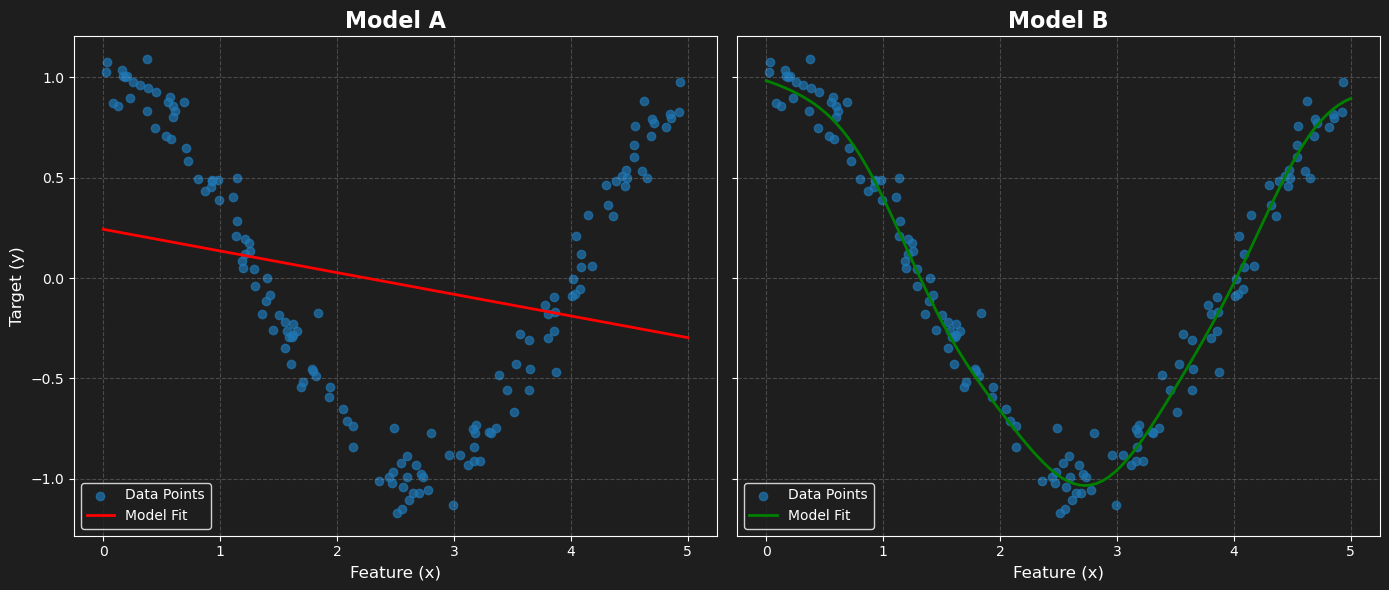

In [7]:

# 1. Generate non-linear sample data with *smaller variance*
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# Reduced variance from 0.3 to 0.1
n_samples = 150
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
# Reduced variance from 0.3 to 0.1
y = np.cos(1.5 * np.pi/4 * X).ravel() + np.random.randn(n_samples) * 0.1

# Create a dense set of points for plotting the model fits smoothly
X_plot = np.linspace(0, 5, 100)[:, np.newaxis]

# 2. Fit a parametric model (Linear Regression)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_fit = lin_reg.predict(X_plot)

# 3. Fit a non-parametric model (Support Vector Regression with RBF kernel)
svr_rbf = SVR(kernel='rbf', C=100, gamma=1.0, epsilon=0.1)
svr_rbf.fit(X, y)
y_svr_fit = svr_rbf.predict(X_plot)

# 4. Define the dark background color and text color
BG_COLOR = '#1e1e1e'
TEXT_COLOR = 'white'

# Create the 1x2 subplot figure
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Set the figure background color
fig.set_facecolor(BG_COLOR)

# 5. Subplot 1: Parametric Model (Model A)
ax[0].set_facecolor(BG_COLOR) # Set axes background
ax[0].scatter(X, y, alpha=0.7, label='Data Points')
ax[0].plot(X_plot, y_lin_fit, color='red', lw=2, label='Model Fit')
ax[0].set_title('Model A', fontsize=16, fontweight='bold', color=TEXT_COLOR)
ax[0].set_xlabel('Feature (x)', fontsize=12, color=TEXT_COLOR)
ax[0].set_ylabel('Target (y)', fontsize=12, color=TEXT_COLOR)
ax[0].grid(True, linestyle='--', alpha=0.3) # Lighter grid for dark bg

# Set tick and spine colors
ax[0].tick_params(colors=TEXT_COLOR, which='both')
for spine in ax[0].spines.values():
    spine.set_edgecolor(TEXT_COLOR)

# Set legend colors
legend1 = ax[0].legend()
for text in legend1.get_texts():
    text.set_color(TEXT_COLOR)
legend1.get_frame().set_facecolor(BG_COLOR)
legend1.get_frame().set_edgecolor(TEXT_COLOR)


# 6. Subplot 2: Non-Parametric Model (Model B)
ax[1].set_facecolor(BG_COLOR) # Set axes background
ax[1].scatter(X, y, alpha=0.7, label='Data Points')
ax[1].plot(X_plot, y_svr_fit, color='green', lw=2, label='Model Fit')
ax[1].set_title('Model B', fontsize=16, fontweight='bold', color=TEXT_COLOR)
ax[1].set_xlabel('Feature (x)', fontsize=12, color=TEXT_COLOR)
ax[1].grid(True, linestyle='--', alpha=0.3)

# Set tick and spine colors
ax[1].tick_params(colors=TEXT_COLOR, which='both')
for spine in ax[1].spines.values():
    spine.set_edgecolor(TEXT_COLOR)

# Set legend colors
legend2 = ax[1].legend()
for text in legend2.get_texts():
    text.set_color(TEXT_COLOR)
legend2.get_frame().set_facecolor(BG_COLOR)
legend2.get_frame().set_edgecolor(TEXT_COLOR)


# 7. Add a main title
# fig.suptitle(
#     'Parametric vs. Non-Parametric: Which is Which?',
#     fontsize=20,
#     y=1.02,
#     color=TEXT_COLOR
# )

# 8. Adjust layout and save the figure
plt.tight_layout()
plt.savefig('parametric_vs_nonparametric_dark.png', facecolor=BG_COLOR)

print("Plot saved as 'parametric_vs_nonparametric_dark.png'")

/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_30794/379473514.py:56: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  new_point_artist, = ax.plot([], [], 'o', color=color_new, markersize=15, marker='*', zorder=5, label='New Point (?)')
MovieWriter imagemagick unavailable; using Pillow instead.


Saving animation... This may take a moment.
Done saving knn_visualization.gif


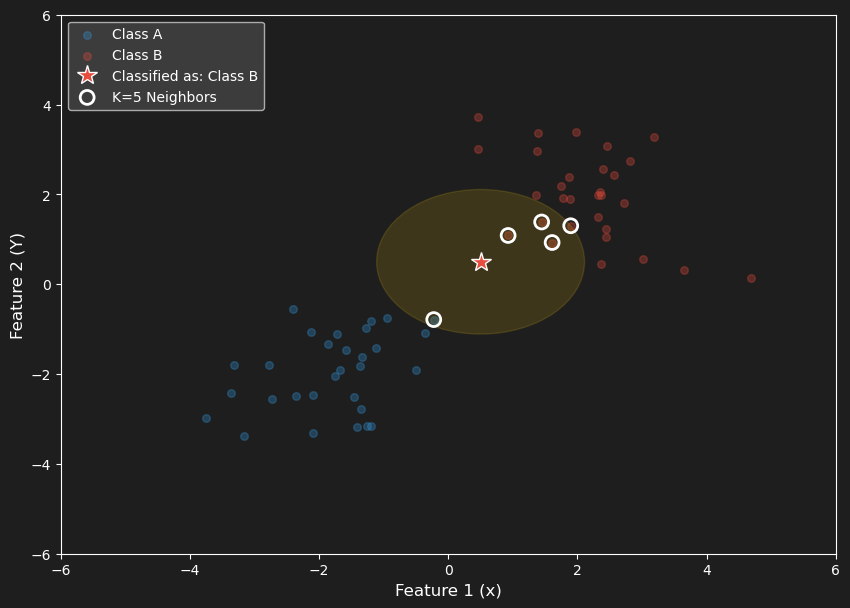

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.stats import mode

# --- 1. Define Core Data ---
np.random.seed(42)

# Create two clusters of data
cluster_A_data = np.random.multivariate_normal(mean=[-2, -2], cov=[[1, 0.5],[0.5, 1]], size=30)
cluster_B_data = np.random.multivariate_normal(mean=[2, 2], cov=[[1, -0.5],[-0.5, 1]], size=30)

# Combine all data for later distance calculations
all_data = np.vstack((cluster_A_data, cluster_B_data))
all_labels = np.array([0] * 30 + [1] * 30) # 0 for A, 1 for B

# Define colors
color_A = '#3498DB' # Blue
color_B = '#E74C3C' # Red
color_new = '#F1C40F' # Yellow for unclassified

# --- 2. Define the New Query Point and K ---
new_point = np.array([0.5, 0.5]) # Our unclassified point
K = 5

# Calculate distances and find neighbors (pre-calculate for efficiency)
distances = np.linalg.norm(all_data - new_point, axis=1)
nearest_indices = np.argsort(distances)[:K]
k_nearest_neighbors = all_data[nearest_indices]
k_nearest_labels = all_labels[nearest_indices]
radius = distances[nearest_indices[-1]]
vote_result = mode(k_nearest_labels, keepdims=True)[0][0]
winning_class_name = "Class A" if vote_result == 0 else "Class B"
winning_color = color_A if vote_result == 0 else color_B
votes_A = np.sum(k_nearest_labels == 0)
votes_B = np.sum(k_nearest_labels == 1)


# --- 3. Setup the Figure and Axes (Common to all frames) ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel("Feature 1 (x)", color='white', fontsize=12)
ax.set_ylabel("Feature 2 (Y)", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# --- 4. Initialize Plot Elements (for blitting) ---
# These will be updated in the animation
scatter_A = ax.scatter([], [], color=color_A, s=30, label='Class A', alpha=0.8)
scatter_B = ax.scatter([], [], color=color_B, s=30, label='Class B', alpha=0.8)
new_point_artist, = ax.plot([], [], 'o', color=color_new, markersize=15, marker='*', zorder=5, label='New Point (?)')
# Give it a label now, we'll hide/show it by setting the label text
neighbors_outline = ax.scatter([], [], s=100, facecolors='none', edgecolors='white', linewidths=2, zorder=4, label=f'K={K} Neighbors')
neighborhood_circle = plt.Circle(new_point, 0, color=color_new, alpha=0.15, zorder=3)
ax.add_patch(neighborhood_circle)

# Text elements that will change or appear
title_text = ax.set_title("", color='white', fontsize=16)

# We will create/update the legend inside the update function
legend = None


# --- 5. Animation Update Function ---
def update(frame):
    global legend # Tell the function to use/modify the global legend variable

    current_title = ""

    # --- Clear previous legend if it exists ---
    if legend:
        legend.remove()

    # Frame 0-10: Show initial data
    if frame <= 10:
        current_title = "Step 1: The Existing Classified Data"
        scatter_A.set_offsets(cluster_A_data)
        scatter_B.set_offsets(cluster_B_data)

        # Hide other elements
        new_point_artist.set_data([], [])
        neighbors_outline.set_offsets(np.empty((0,2)))
        neighborhood_circle.set_radius(0)

        # Set labels for this step (use '_' to hide from legend)
        scatter_A.set_label('Class A')
        scatter_B.set_label('Class B')
        new_point_artist.set_label('_')
        neighbors_outline.set_label('_')

    # Frame 11-20: Add new query point
    elif frame <= 20:
        current_title = "Step 2: A New, Unclassified Point Appears"
        scatter_A.set_alpha(0.8)
        scatter_B.set_alpha(0.8)
        new_point_artist.set_data([new_point[0]], [new_point[1]])
        new_point_artist.set_color(color_new) # Ensure it's yellow
        new_point_artist.set_markeredgecolor(None)

        # Set labels for this step
        new_point_artist.set_label('New Point (?)')
        neighbors_outline.set_label('_')

    # Frame 21-40: Find K-Nearest Neighbors
    elif frame <= 40:
        current_title = f"Step 3: Finding K={K} Nearest Neighbors"
        scatter_A.set_alpha(0.3) # Fade existing data
        scatter_B.set_alpha(0.3) # Fade existing data

        neighbors_outline.set_offsets(k_nearest_neighbors)

        # Animate the circle growing
        circle_progress = min(1, (frame - 20) / 10) # 10 frames to grow
        neighborhood_circle.set_radius(radius * circle_progress)

        # Set labels for this step
        neighbors_outline.set_label(f'K={K} Neighbors')
        new_point_artist.set_label('New Point (?)') # Keep this label

    # Frame 41-End: Final Classification
    else:
        current_title = f"Step 4: Classification! (Vote: {votes_A} Blue, {votes_B} Red)"

        # Change new point's color to the winning class
        new_point_artist.set_color(winning_color)
        new_point_artist.set_markeredgecolor('white')
        new_point_artist.set_linewidth(0.5)

        # Set labels for this step
        new_point_artist.set_label(f'Classified as: {winning_class_name}')
        neighbors_outline.set_label(f'K={K} Neighbors') # Keep this label

    #title_text.set_text(current_title)

    # --- Redraw the legend every frame ---
    # This ensures it's always up-to-date with the current labels
    legend = ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
    for text in legend.get_texts():
        plt.setp(text, color='white')

    # Return all artists that might have been modified
    return scatter_A, scatter_B, new_point_artist, neighbors_outline, neighborhood_circle, title_text


# --- 6. Create and Save the Animation ---
num_frames = 50 # Total frames for the animation
ani = animation.FuncAnimation(fig, update, frames=num_frames,
                              init_func=lambda: [], # Empty init
                              blit=False, interval=100) # Interval in ms (100ms = 10fps)

print("Saving animation... This may take a moment.")
# Ensure you have ImageMagick or ffmpeg installed for saving as GIF
# For ImageMagick: writer='imagemagick'
# For FFmpeg: writer='ffmpeg'
ani.save('knn_visualization.gif', writer='imagemagick', fps=10, dpi=100)
print("Done saving knn_visualization.gif")

# plt.show() # Uncomment this to show the plot window after saving

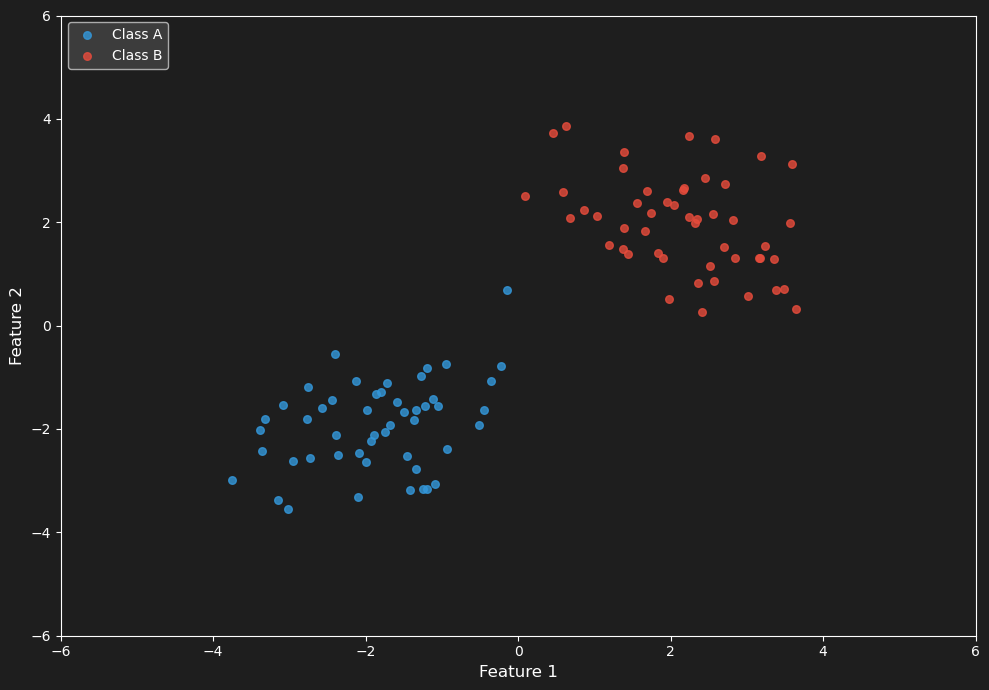

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# --- 1. Define "True" Parameters (The "God Mode" view) ---
# We'll use these to generate our data, but they are "hidden" from the model
mean_A = [-2, -2]
cov_A = [[1, 0.5], [0.5, 1]] # Diagonal covariance = circular
mean_B = [2, 2]
cov_B = [[1, -0.5], [-0.5, 1]] # Different covariance
priors = [0.5, 0.5] # We'll assume equal priors (50% chance of A, 50% of B)

# --- 2. Generate 100 Observations ---
np.random.seed(42) # For reproducibility
n_obs = 100
n_A = int(n_obs * priors[0])
n_B = int(n_obs * priors[1])

# Generate 50 points from Class A and 50 from Class B
class_A_data = np.random.multivariate_normal(mean_A, cov_A, n_A)
class_B_data = np.random.multivariate_normal(mean_B, cov_B, n_B)

# Define colors
color_A = '#3498DB' # Blue
color_B = '#E74C3C' # Red

# --- 3. Setup Plot 1: The "Problem" ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel("Feature 1", color='white', fontsize=12)
ax.set_ylabel("Feature 2", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# ax.set_title("Step 1: Our 100 Observations", color='white', fontsize=16)

# --- 4. Plot the Data ---
ax.scatter(class_A_data[:, 0], class_A_data[:, 1], color=color_A, s=30, label='Class A', alpha=0.8)
ax.scatter(class_B_data[:, 0], class_B_data[:, 1], color=color_B, s=30, label='Class B', alpha=0.8)

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.savefig('100_observations.png', dpi=300)


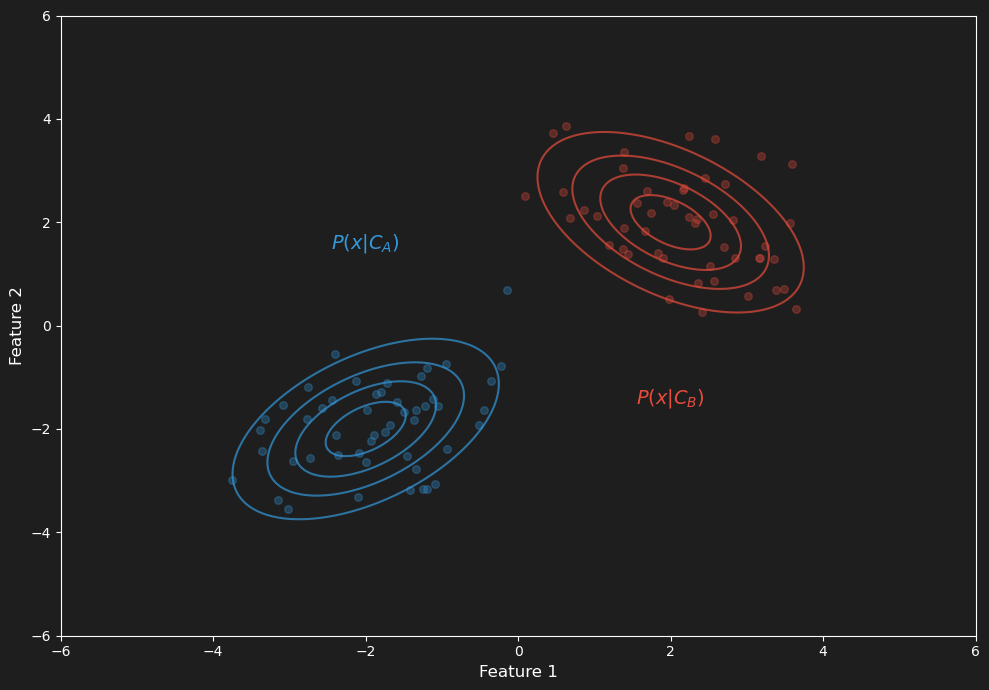

In [18]:
# --- 1. Create a grid to evaluate the "true" distributions ---
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
xx, yy = np.meshgrid(x, y)
pos = np.dstack((xx, yy))

# --- 2. Define the "true" multivariate normal distributions ---
# These are the *likelihoods* P(x | Class A) and P(x | Class B)
rv_A = multivariate_normal(mean_A, cov_A)
rv_B = multivariate_normal(mean_B, cov_B)

pdf_A = rv_A.pdf(pos)
pdf_B = rv_B.pdf(pos)

# --- 3. Setup Plot 2: The "Ground Truth" ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')
ax.set_xlim(-6, 6); ax.set_ylim(-6, 6)
ax.set_xlabel("Feature 1", color='white', fontsize=12)
ax.set_ylabel("Feature 2", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# ax.set_title("Step 2: The 'Ground Truth' Distributions $P(x | C_k)$", color='white', fontsize=16)

# --- 4. Plot the Data (faded) and the Contours (NEW) ---
ax.scatter(class_A_data[:, 0], class_A_data[:, 1], color=color_A, s=30, alpha=0.3)
ax.scatter(class_B_data[:, 0], class_B_data[:, 1], color=color_B, s=30, alpha=0.3)

# Plot the likelihood contours
ax.contour(xx, yy, pdf_A, colors=color_A, alpha=0.7, levels=5)
ax.contour(xx, yy, pdf_B, colors=color_B, alpha=0.7, levels=5)

ax.text(-2, 1.5, "$P(x | C_A)$", color=color_A, fontsize=14, ha='center')
ax.text(2, -1.5, "$P(x | C_B)$", color=color_B, fontsize=14, ha='center')

plt.tight_layout()
plt.show()

/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_30794/2374739839.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, boundary_function, levels=[0],


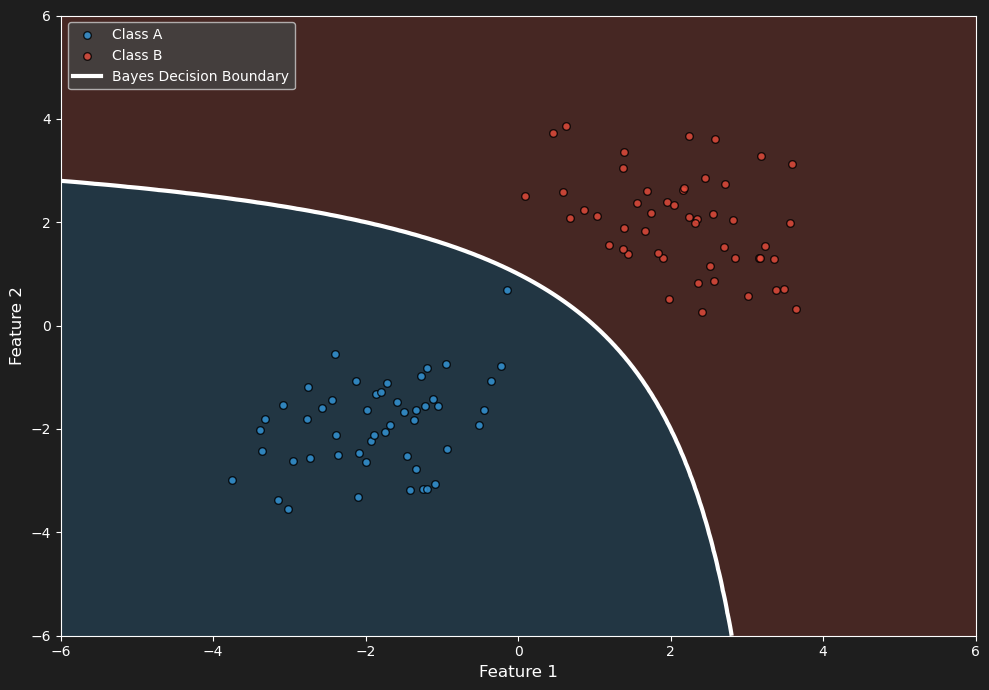

In [19]:
# --- 1. Calculate Posterior Probabilities (or just the difference) ---
# Since priors are equal (0.5), the boundary is just where pdf_A = pdf_B,
# or equivalently, where pdf_A - pdf_B = 0.
# We'll use this difference to find the boundary and fill the regions.
boundary_function = pdf_A * priors[0] - pdf_B * priors[1]

# --- 2. Setup Plot 3: The Bayes Classifier ---
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')
ax.set_xlim(-6, 6); ax.set_ylim(-6, 6)
ax.set_xlabel("Feature 1", color='white', fontsize=12)
ax.set_ylabel("Feature 2", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# ax.set_title("Step 3: The Bayes Optimal Decision Boundary", color='white', fontsize=16)

# --- 3. Plot the Decision Regions (NEW) ---
# Fill the area where Class A > Class B (boundary_function > 0)
ax.contourf(xx, yy, boundary_function, levels=[0, np.inf],
            colors=[color_A], alpha=0.2)
# Fill the area where Class B > Class A (boundary_function < 0)
ax.contourf(xx, yy, boundary_function, levels=[-np.inf, 0],
            colors=[color_B], alpha=0.2)

# --- 4. Plot the Decision Boundary (NEW) ---
# Plot the exact line where boundary_function = 0
ax.contour(xx, yy, boundary_function, levels=[0],
           colors='white', linewidths=3, label="Bayes Decision Boundary")

# --- 5. Plot the original data on top ---
ax.scatter(class_A_data[:, 0], class_A_data[:, 1], color=color_A, s=30, label='Class A', alpha=0.8, edgecolors='black')
ax.scatter(class_B_data[:, 0], class_B_data[:, 1], color=color_B, s=30, label='Class B', alpha=0.8, edgecolors='black')

# Add a dummy artist for the legend
boundary_line = plt.Line2D([0], [0], color='white', lw=3, label='Bayes Decision Boundary')
handles, labels = ax.get_legend_handles_labels()
handles.append(boundary_line)

ax.legend(handles=handles, loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_30794/3077296050.py:58: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, boundary_function, levels=[0, np.inf],
/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_30794/3077296050.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, boundary_function, levels=[-np.inf, 0],


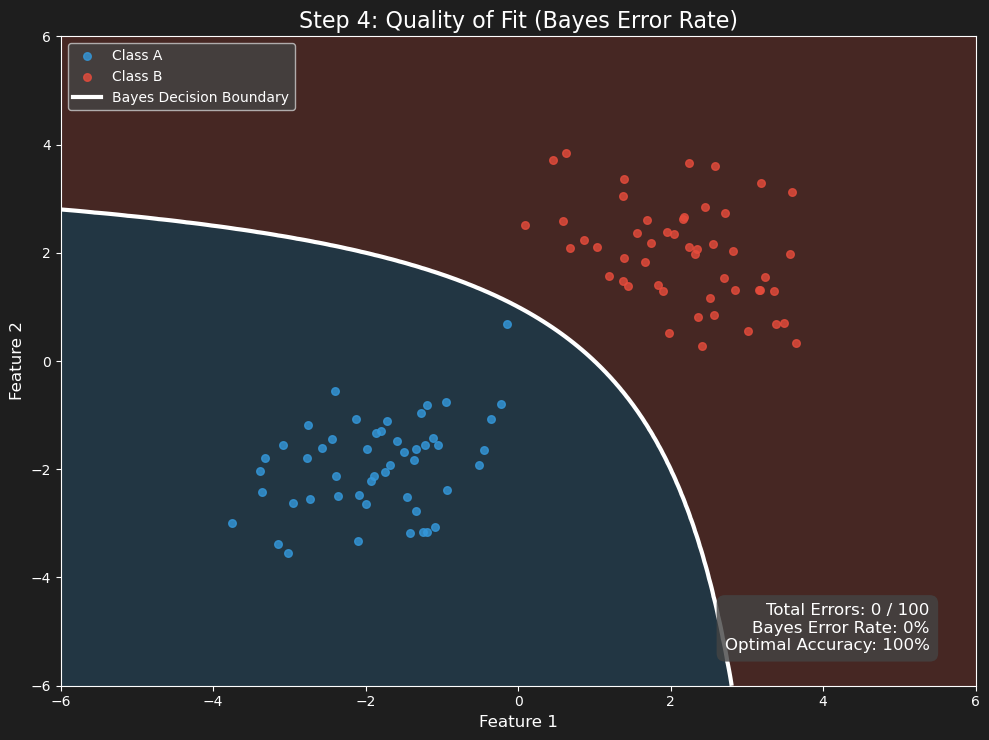

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# --- 1. Define "True" Parameters (The "God Mode" view) ---
mean_A = [-2, -2]
cov_A = [[1, 0.5], [0.5, 1]] # Diagonal covariance = circular
mean_B = [2, 2]
cov_B = [[1, -0.5], [-0.5, 1]] # Different covariance
priors = [0.5, 0.5] # We'll assume equal priors (50% chance of A, 50% of B)

# Define colors
color_A = '#3498DB' # Blue
color_B = '#E74C3C' # Red

# --- 2. Generate 100 Observations ---
np.random.seed(42) # For reproducibility
n_obs = 100
n_A = int(n_obs * priors[0])
n_B = int(n_obs * priors[1])

# Generate 50 points from Class A and 50 from Class B
class_A_data = np.random.multivariate_normal(mean_A, cov_A, n_A)
class_B_data = np.random.multivariate_normal(mean_B, cov_B, n_B)

# --- 3. Create Grid for Contours ---
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
xx, yy = np.meshgrid(x, y)
pos = np.dstack((xx, yy))

# --- 4. Define "true" distributions (Likelihoods) ---
rv_A = multivariate_normal(mean_A, cov_A)
rv_B = multivariate_normal(mean_B, cov_B)
pdf_A = rv_A.pdf(pos)
pdf_B = rv_B.pdf(pos)

# --- 5. Calculate Decision Boundary Function ---
boundary_function = pdf_A * priors[0] - pdf_B * priors[1]

# ==================================================================
# --- PLOT 4: Measuring Quality of Fit (The Errors) ---
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')
ax.set_xlim(-6, 6); ax.set_ylim(-6, 6)
ax.set_xlabel("Feature 1", color='white', fontsize=12)
ax.set_ylabel("Feature 2", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_title("Step 4: Quality of Fit (Bayes Error Rate)", color='white', fontsize=16)

# --- 6. Plot the Decision Regions ---
# Fill the area where Class A > Class B (boundary_function > 0)
ax.contourf(xx, yy, boundary_function, levels=[0, np.inf],
            colors=[color_A], alpha=0.2, label="Predicted Region A")
# Fill the area where Class B > Class A (boundary_function < 0)
ax.contourf(xx, yy, boundary_function, levels=[-np.inf, 0],
            colors=[color_B], alpha=0.2, label="Predicted Region B")

# Plot the decision boundary line
ax.contour(xx, yy, boundary_function, levels=[0], colors='white', linewidths=3)

# --- 7. Find and Highlight Misclassified Points (NEW) ---
misclassified_points = []
total_errors = 0

# Check Class A data
# P(x | A) * P(A) < P(x | B) * P(B)  ->  Misclassified!
pred_A = rv_A.pdf(class_A_data) * priors[0]
pred_B_for_A = rv_B.pdf(class_A_data) * priors[1]
errors_A = class_A_data[pred_A < pred_B_for_A]
total_errors += len(errors_A)

# Check Class B data
# P(x | B) * P(B) < P(x | A) * P(A)  ->  Misclassified!
pred_B = rv_B.pdf(class_B_data) * priors[1]
pred_A_for_B = rv_A.pdf(class_B_data) * priors[0]
errors_B = class_B_data[pred_B < pred_A_for_B]
total_errors += len(errors_B)

# --- 8. Plot the Data and Errors ---
ax.scatter(class_A_data[:, 0], class_A_data[:, 1], color=color_A, s=30, label='Class A', alpha=0.8)
ax.scatter(class_B_data[:, 0], class_B_data[:, 1], color=color_B, s=30, label='Class B', alpha=0.8)

# Plot misclassified points from Class A (Blue dots in Red region)
if len(errors_A) > 0:
    ax.scatter(errors_A[:, 0], errors_A[:, 1], color=color_A, s=150,
               marker='X', label='Misclassified (Irreducible Error)', edgecolors='yellow', linewidths=2)
# Plot misclassified points from Class B (Red dots in Blue region)
if len(errors_B) > 0:
    ax.scatter(errors_B[:, 0], errors_B[:, 1], color=color_B, s=150,
               marker='X', edgecolors='yellow', linewidths=2)

# --- 9. Display Error Rate ---
error_rate = total_errors / n_obs
accuracy = 1.0 - error_rate

info_text = f"Total Errors: {total_errors} / {n_obs}\n" \
            f"Bayes Error Rate: {error_rate:.0%}\n" \
            f"Optimal Accuracy: {accuracy:.0%}"

ax.text(0.95, 0.05, info_text, transform=ax.transAxes,
        fontsize=12, color='white', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='#444444', ec='none', alpha=0.8))

# Add a dummy artist for the boundary legend
boundary_line = plt.Line2D([0], [0], color='white', lw=3, label='Bayes Decision Boundary')
handles, labels = ax.get_legend_handles_labels()
# Manually add boundary line if not present (it is in ax.collections)
handles.append(boundary_line)

ax.legend(handles=handles, loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_30794/1159924268.py:59: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, boundary_function, levels=[0, np.inf],
/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_30794/1159924268.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(xx, yy, boundary_function, levels=[-np.inf, 0],


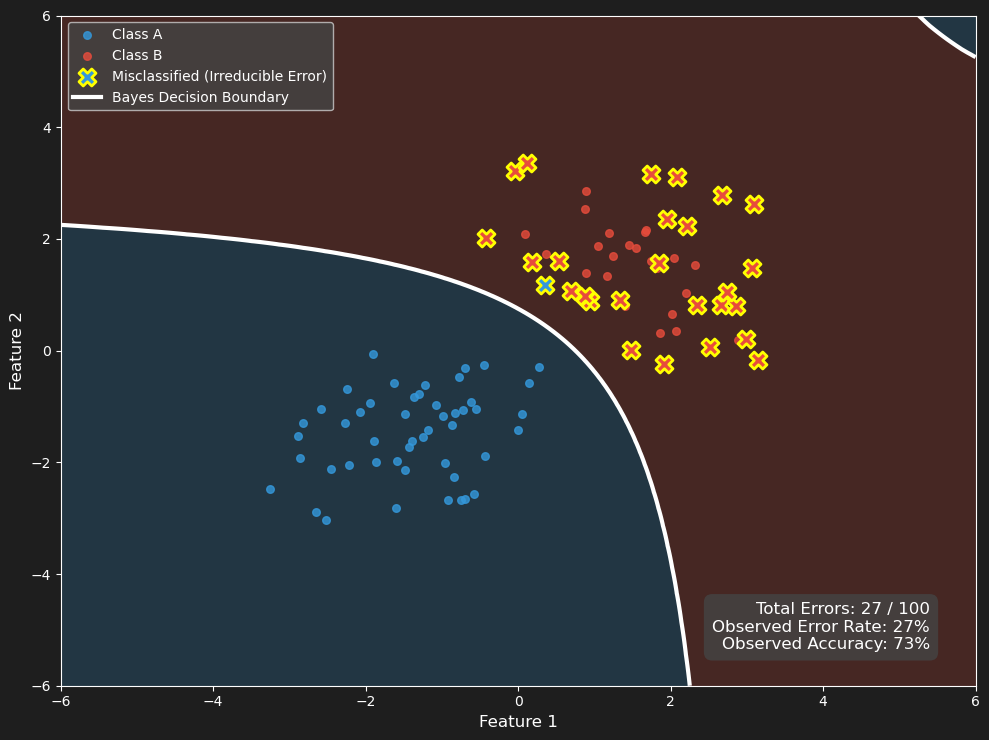

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# --- 1. Define "True" Parameters (WITH MORE OVERLAP) ---
# --- CHANGED MEANS to be closer together ---
mean_A = [-1.5, -1.5] # Was [-2, -2]
cov_A = [[1, 0.5], [0.5, 1]]
mean_B = [1.5, 1.5]   # Was [2, 2]
cov_B = [[1, -0.5], [-0.5, 1]]
# --- END CHANGE ---
priors = [0.5, 0.5]

# Define colors
color_A = '#3498DB' # Blue
color_B = '#E74C3C' # Red

# --- 2. Generate 100 Observations ---
# We can use any seed now, errors are guaranteed. Let's go back to 42.
np.random.seed(42)
n_obs = 100
n_A = int(n_obs * priors[0])
n_B = int(n_obs * priors[1])

class_A_data = np.random.multivariate_normal(mean_A, cov_A, n_A)
class_B_data = np.random.multivariate_normal(mean_B, cov_B, n_B)

# --- 3. Create Grid for Contours ---
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
xx, yy = np.meshgrid(x, y)
pos = np.dstack((xx, yy))

# --- 4. Define "true" distributions (Likelihoods) ---
rv_A = multivariate_normal(mean_A, cov_A)
rv_B = multivariate_normal(mean_B, cov_B)
pdf_A = rv_A.pdf(pos)
pdf_B = rv_B.pdf(pos)

# --- 5. Calculate Decision Boundary Function ---
boundary_function = pdf_A * priors[0] - pdf_B * priors[1]

# ==================================================================
# --- PLOT: Measuring Quality of Fit (With Guaranteed Errors) ---
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')
ax.set_xlim(-6, 6); ax.set_ylim(-6, 6)
ax.set_xlabel("Feature 1", color='white', fontsize=12)
ax.set_ylabel("Feature 2", color='white', fontsize=12)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# ax.set_title("Step 4 (Forced Overlap): Quality of Fit (Bayes Error Rate)", color='white', fontsize=16)

# --- 6. Plot the Decision Regions ---
ax.contourf(xx, yy, boundary_function, levels=[0, np.inf],
            colors=[color_A], alpha=0.2, label="Predicted Region A")
ax.contourf(xx, yy, boundary_function, levels=[-np.inf, 0],
            colors=[color_B], alpha=0.2, label="Predicted Region B")

# Plot the decision boundary line
ax.contour(xx, yy, boundary_function, levels=[0], colors='white', linewidths=3)

# --- 7. Find and Highlight Misclassified Points ---
total_errors = 0

# Check Class A data
pred_A = rv_A.pdf(class_A_data) * priors[0]
pred_B_for_A = rv_B.pdf(class_A_data) * priors[1]
errors_A = class_A_data[pred_A < pred_B_for_A]
total_errors += len(errors_A)

# Check Class B data
pred_B = rv_B.pdf(class_B_data) * priors[1]
pred_A_for_B = rv_A.pdf(class_A_data) * priors[0]
errors_B = class_B_data[pred_B < pred_A_for_B]
total_errors += len(errors_B)

# --- 8. Plot the Data and Errors ---
ax.scatter(class_A_data[:, 0], class_A_data[:, 1], color=color_A, s=30, label='Class A', alpha=0.8)
ax.scatter(class_B_data[:, 0], class_B_data[:, 1], color=color_B, s=30, label='Class B', alpha=0.8)

# Plot misclassified points from Class A (Blue dots in Red region)
if len(errors_A) > 0:
    ax.scatter(errors_A[:, 0], errors_A[:, 1], color=color_A, s=150,
               marker='X', label='Misclassified (Irreducible Error)', edgecolors='yellow', linewidths=2)
# Plot misclassified points from Class B (Red dots in Blue region)
if len(errors_B) > 0:
    label = '_Misclassified' if len(errors_A) > 0 else 'Misclassified (Irreducible Error)'
    ax.scatter(errors_B[:, 0], errors_B[:, 1], color=color_B, s=150,
               marker='X', label=label, edgecolors='yellow', linewidths=2)

# --- 9. Display Error Rate ---
error_rate = total_errors / n_obs
accuracy = 1.0 - error_rate

info_text = f"Total Errors: {total_errors} / {n_obs}\n" \
            f"Observed Error Rate: {error_rate:.0%}\n" \
            f"Observed Accuracy: {accuracy:.0%}"

ax.text(0.95, 0.05, info_text, transform=ax.transAxes,
        fontsize=12, color='white', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='#444444', ec='none', alpha=0.8))

# Add a dummy artist for the boundary legend
boundary_line = plt.Line2D([0], [0], color='white', lw=3, label='Bayes Decision Boundary')
handles, labels = ax.get_legend_handles_labels()
handles.append(boundary_line)

ax.legend(handles=handles, loc='upper left', facecolor='#444444', labelcolor='white', fontsize=10)
plt.tight_layout()
plt.show()

Image saved to accuracy.png


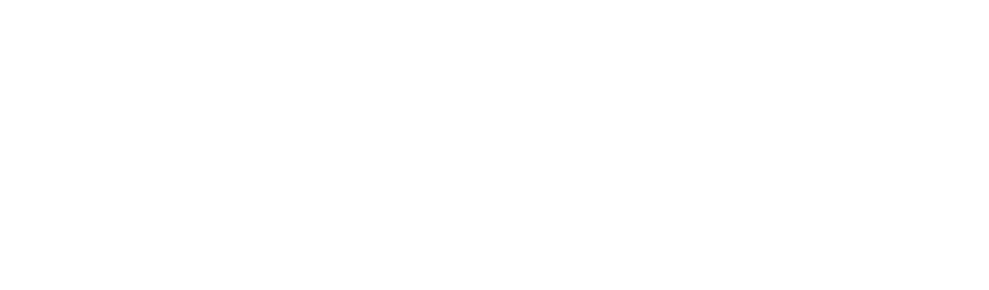

In [29]:
# Define the LaTeX string
latex_equation = r'$\text{Accuracy}=\frac{\text{Correct Predictions}}{\text{All Predictions}}$'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Add the text to the axes
ax.text(0.5, 0.5, latex_equation,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=24,
        color='white')

# Turn off the axes
ax.axis('off')

# Set the figure background to be transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with a transparent background
file_name = 'accuracy.png'
plt.savefig(file_name, transparent=True, dpi=300)

print(f"Image saved to {file_name}")

In [ ]:
# Define the LaTeX string
latex_equation = r'$\text{Accuracy}=\frac{\text{Correct Predictions}}{\text{All Predictions}}$'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Add the text to the axes
ax.text(0.5, 0.5, latex_equation,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=24,
        color='white')

# Turn off the axes
ax.axis('off')

# Set the figure background to be transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with a transparent background
file_name = 'general_form.png'
plt.savefig(file_name, transparent=True, dpi=300)

print(f"Image saved to {file_name}")

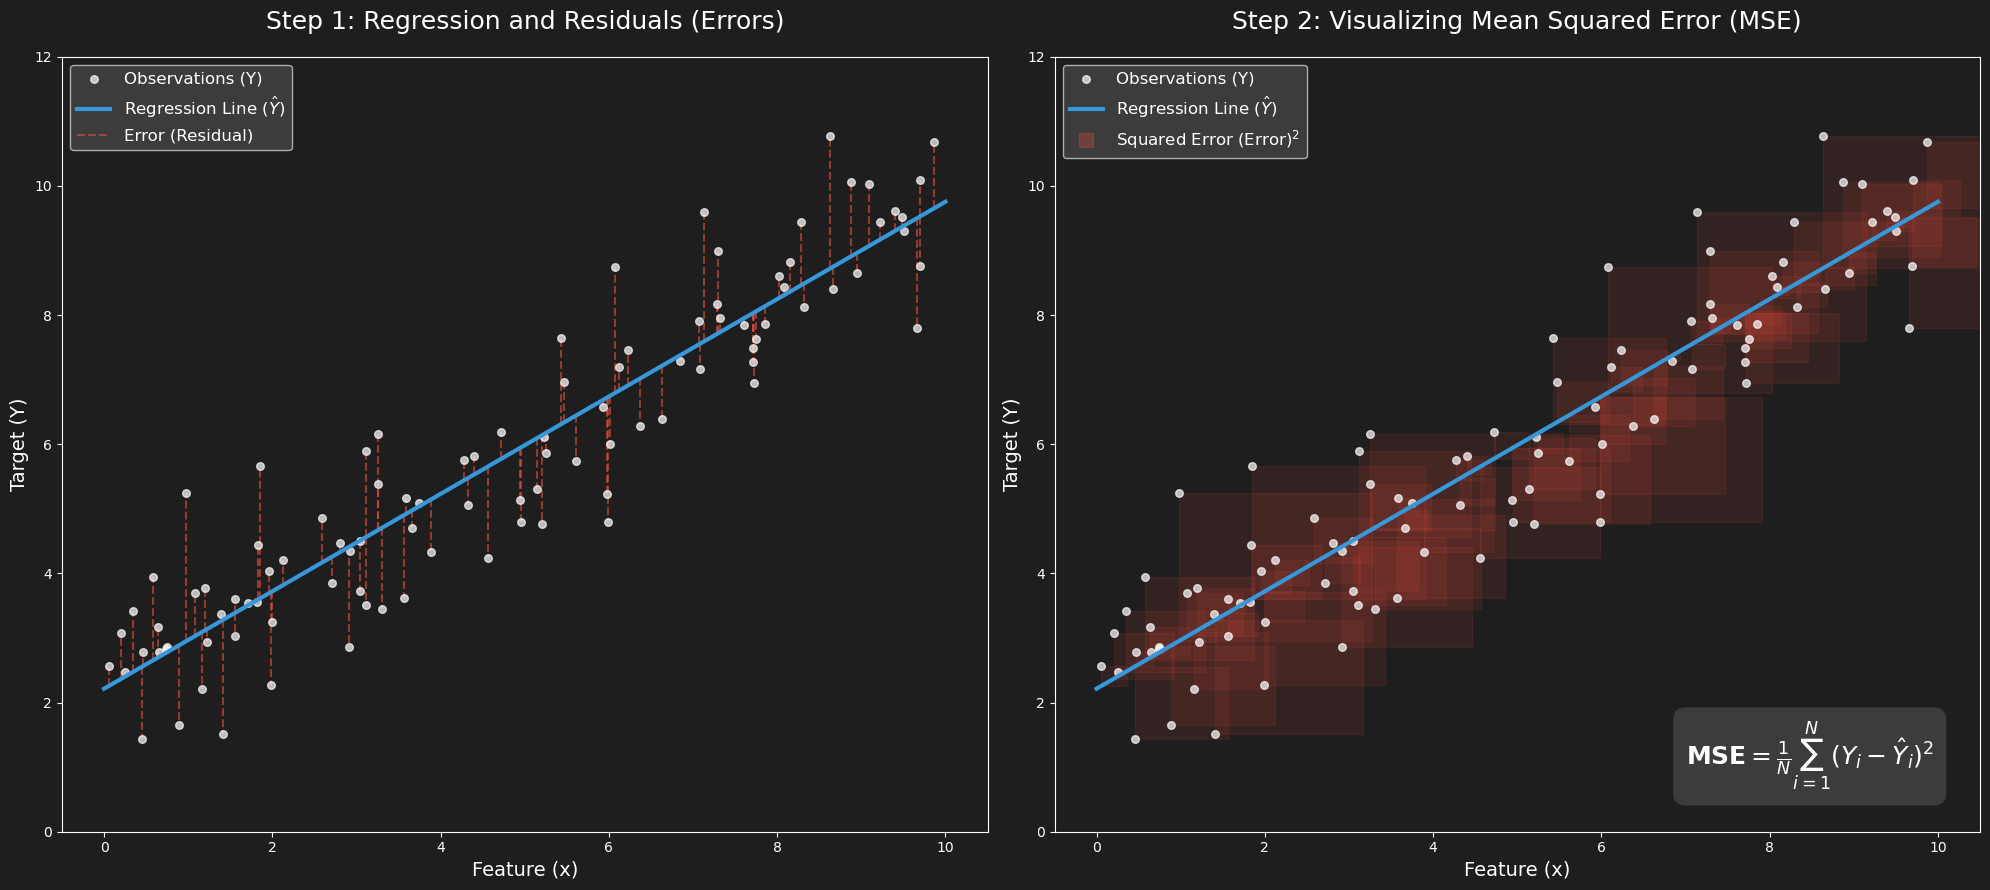

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# --- 1. Generate Data (What the data scientist sees) ---
np.random.seed(42) # For reproducibility
n_obs = 100

# Generate X data
x_data = np.random.uniform(0, 10, n_obs)

# Generate Y data based on a *hidden* true function f(x) = 0.8x + 2
# and add "irreducible error" (noise)
epsilon = np.random.normal(0, 1.0, n_obs)
y_data = 0.8 * x_data + 2 + epsilon

# --- 2. Fit the Regression Model (Our "f_hat") ---
# Find the line of best fit (our model, f_hat)
m, c = np.polyfit(x_data, y_data, 1)

# Get the y-values of the regression line for every x in our data
y_pred = m * x_data + c
# Get the continuous line for plotting
x_vals = np.array([0, 10])
y_model = m * x_vals + c

# Calculate the residuals (the errors)
residuals = y_data - y_pred

# ==================================================================
# --- 3. Create the Figure with 2 Subplots ---
# ==================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
fig.patch.set_facecolor('#1E1E1E')

# --- Helper function to style each axis ---
def style_ax(ax, title):
    ax.set_facecolor('#1E1E1E')
    ax.set_xlim(-0.5, 10.5); ax.set_ylim(0, 12)
    ax.set_xlabel("Feature (x)", color='white', fontsize=14)
    ax.set_ylabel("Target (Y)", color='white', fontsize=14)
    ax.tick_params(axis='both', colors='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    ax.set_title(title, color='white', fontsize=18, pad=20)

# ==================================================================
# --- PLOT 1: Regression and Residuals (Errors) ---
# ==================================================================
style_ax(ax1, "Step 1: Regression and Residuals (Errors)")

# Plot the 100 observations
ax1.scatter(x_data, y_data, color='white', alpha=0.7, s=30, label='Observations (Y)', zorder=5)

# Plot the regression line
ax1.plot(x_vals, y_model, color='#3498DB', linewidth=3, label='Regression Line ($\\hat{Y}$)', zorder=10)

# Plot the error lines (residuals)
ax1.vlines(x_data, ymin=y_pred, ymax=y_data, colors='#E74C3C', linestyles='--',
           alpha=0.6, label='Error (Residual)', zorder=3)

ax1.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=12)

# ==================================================================
# --- PLOT 2: Visualizing Mean Squared Error (MSE) ---
# ==================================================================
style_ax(ax2, "Step 2: Visualizing Mean Squared Error (MSE)")

# Plot the 100 observations
ax2.scatter(x_data, y_data, color='white', alpha=0.7, s=30, label='Observations (Y)', zorder=5)

# Plot the regression line
ax2.plot(x_vals, y_model, color='#3498DB', linewidth=3, label='Regression Line ($\\hat{Y}$)', zorder=10)

# Plot the SQUARES of the errors
for i in range(n_obs):
    side_length = abs(residuals[i])
    # Anchor the square at the corner
    anchor_point = (x_data[i], min(y_data[i], y_pred[i]))

    square = Rectangle(anchor_point, side_length, side_length,
                       color='#E74C3C', alpha=0.1, zorder=3)
    ax2.add_patch(square)

# Add a label for the squares (as a dummy plot)
ax2.plot([], [], color='#E74C3C', marker='s', markersize=10,
         alpha=0.3, linestyle='None', label='Squared Error (Error)$^2$')

# Add the MSE formula
mse_text = r"$\mathbf{MSE} = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2$"
ax2.text(0.95, 0.05, mse_text, transform=ax2.transAxes,
         fontsize=18, color='white', ha='right', va='bottom',
         bbox=dict(boxstyle='round,pad=0.5', fc='#444444', ec='none', alpha=0.8))

ax2.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=12)

# ==================================================================
# --- Show the final plot ---
plt.tight_layout()
plt.show()

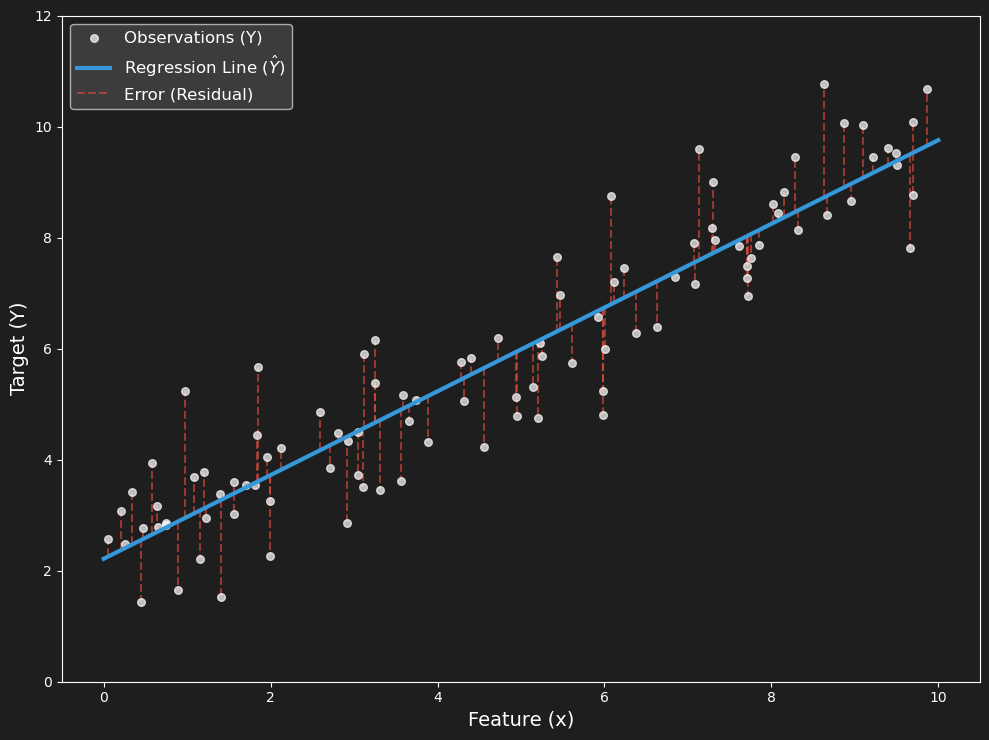

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Generate Data (What the data scientist sees) ---
np.random.seed(42) # For reproducibility
n_obs = 100

# Generate X data
x_data = np.random.uniform(0, 10, n_obs)

# Generate Y data based on a *hidden* true function f(x) = 0.8x + 2
# and add "irreducible error" (noise)
epsilon = np.random.normal(0, 1.0, n_obs)
y_data = 0.8 * x_data + 2 + epsilon

# --- 2. Fit the Regression Model (Our "f_hat") ---
# Find the line of best fit (our model, f_hat)
m, c = np.polyfit(x_data, y_data, 1)

# Get the y-values of the regression line for every x in our data
y_pred = m * x_data + c
# Get the continuous line for plotting
x_vals = np.array([0, 10])
y_model = m * x_vals + c

# ==================================================================
# --- PLOT 1: Regression and Residuals (Errors) ---
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(-0.5, 10.5); ax.set_ylim(0, 12)
ax.set_xlabel("Feature (x)", color='white', fontsize=14)
ax.set_ylabel("Target (Y)", color='white', fontsize=14)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')
# ax.set_title("Step 1: Regression and Residuals (Errors)", color='white', fontsize=18, pad=20)

# Plot the 100 observations
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=30, label='Observations (Y)', zorder=5)

# Plot the regression line
ax.plot(x_vals, y_model, color='#3498DB', linewidth=3, label='Regression Line ($\\hat{Y}$)', zorder=10)

# Plot the error lines (residuals)
ax.vlines(x_data, ymin=y_pred, ymax=y_data, colors='#E74C3C', linestyles='--',
           alpha=0.6, label='Error (Residual)', zorder=3)

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=12)
plt.tight_layout()
plt.show()

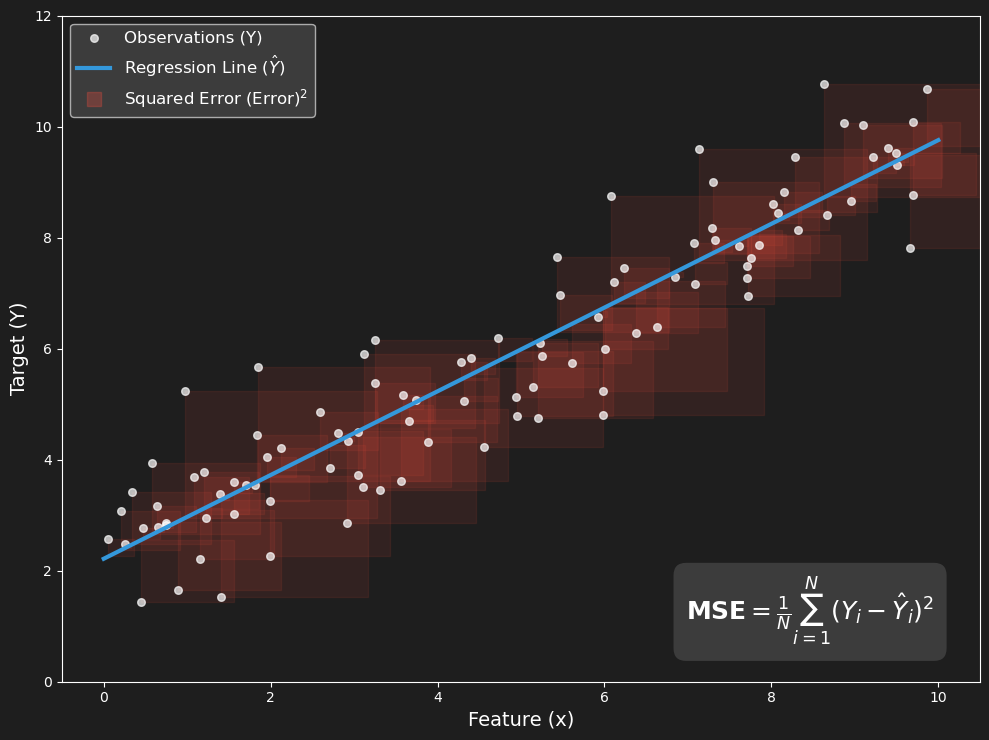

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle # Import for drawing squares

# --- 1. Generate Data (Reproduce from Cell 1) ---
np.random.seed(42) # MUST use the same seed
n_obs = 100
x_data = np.random.uniform(0, 10, n_obs)
epsilon = np.random.normal(0, 1.0, n_obs)
y_data = 0.8 * x_data + 2 + epsilon # y = f(x) + e

# --- 2. Fit the Regression Model (Reproduce from Cell 1) ---
m, c = np.polyfit(x_data, y_data, 1)
y_pred = m * x_data + c
residuals = y_data - y_pred # Need this for the squares
x_vals = np.array([0, 10])
y_model = m * x_vals + c

# ==================================================================
# --- PLOT 2: Visualizing Mean Squared Error (MSE) ---
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(-0.5, 10.5); ax.set_ylim(0, 12)
ax.set_xlabel("Feature (x)", color='white', fontsize=14)
ax.set_ylabel("Target (Y)", color='white', fontsize=14)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')
# ax.set_title("Step 2: Visualizing Mean Squared Error (MSE)", color='white', fontsize=18, pad=20)

# Plot the 100 observations
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=30, label='Observations (Y)', zorder=5)

# Plot the regression line
ax.plot(x_vals, y_model, color='#3498DB', linewidth=3, label='Regression Line ($\\hat{Y}$)', zorder=10)

# Plot the SQUARES of the errors
for i in range(n_obs):
    side_length = abs(residuals[i])
    # Anchor the square at the corner
    anchor_point = (x_data[i], min(y_data[i], y_pred[i]))

    square = Rectangle(anchor_point, side_length, side_length,
                       color='#E74C3C', alpha=0.1, zorder=3)
    ax.add_patch(square)

# Add a label for the squares (as a dummy plot)
ax.plot([], [], color='#E74C3C', marker='s', markersize=10,
         alpha=0.3, linestyle='None', label='Squared Error (Error)$^2$')

# Add the MSE formula
mse_text = r"$\mathbf{MSE} = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2$"
ax.text(0.95, 0.05, mse_text, transform=ax.transAxes,
         fontsize=18, color='white', ha='right', va='bottom',
         bbox=dict(boxstyle='round,pad=0.5', fc='#444444', ec='none', alpha=0.8))

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=12)
plt.tight_layout()
plt.show()

Image saved to mse.png


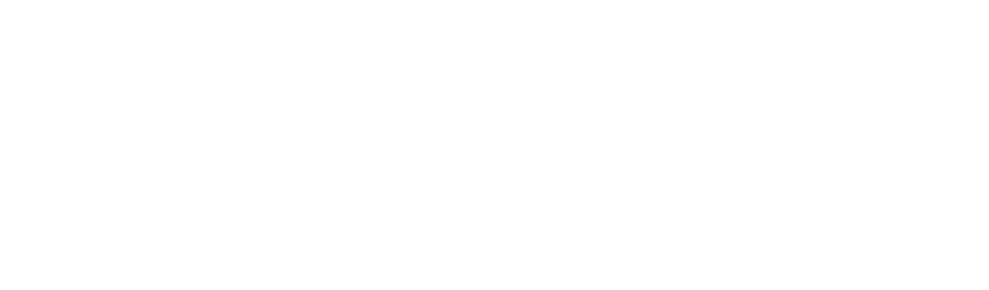

In [41]:
# Define the LaTeX string
latex_equation = r'$\text{MSE}=\frac{1}{n}\sum^n_{i=1}(y_i - \hat{f}(x_i))^2)$'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 3))

# Add the text to the axes
ax.text(0.5, 0.5, latex_equation,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=24,
        color='white')

# Turn off the axes
ax.axis('off')

# Set the figure background to be transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with a transparent background
file_name = 'mse.png'
plt.savefig(file_name, transparent=True, dpi=300)

print(f"Image saved to {file_name}")

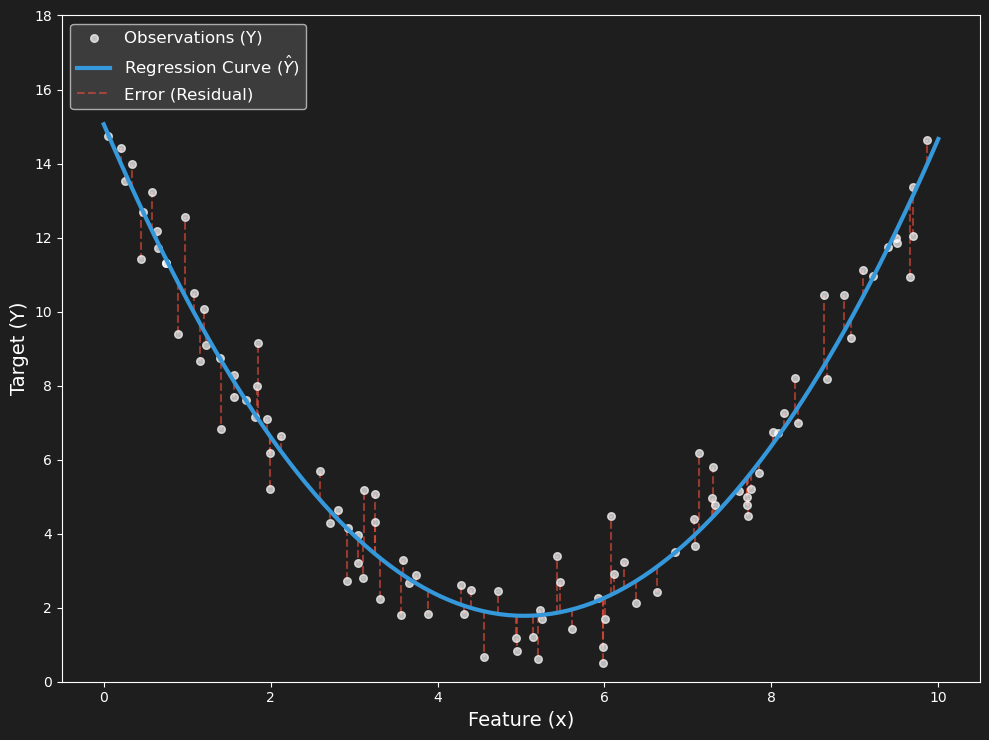

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Generate Non-Linear Data ---
np.random.seed(42) # For reproducibility
n_obs = 100

# Generate X data
x_data = np.random.uniform(0, 10, n_obs)

# Generate Y data based on a *hidden* true quadratic function
# f(x) = 0.5 * (x-5)^2 + 2 + noise
epsilon = np.random.normal(0, 1.0, n_obs)
y_data = 0.5 * (x_data - 5)**2 + 2 + epsilon

# --- 2. Fit a Non-Linear Parametric Model (2nd-Degree Polynomial) ---
# We use np.polyfit with deg=2 to find the best-fit parabola (ax^2 + bx + c)
coeffs = np.polyfit(x_data, y_data, 2)
p = np.poly1d(coeffs) # Create a polynomial function from the coefficients

# Get the y-values of the regression curve for every x in our data
y_pred = p(x_data)

# Get the continuous curve for plotting
x_vals = np.linspace(0, 10, 100)
y_model = p(x_vals)

# ==================================================================
# --- PLOT 1: Non-Linear Regression and Residuals (Errors) ---
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(-0.5, 10.5); ax.set_ylim(0, 18)
ax.set_xlabel("Feature (x)", color='white', fontsize=14)
ax.set_ylabel("Target (Y)", color='white', fontsize=14)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')
# ax.set_title("Step 1: Non-Linear Regression and Residuals", color='white', fontsize=18, pad=20)

# Plot the 100 observations
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=30, label='Observations (Y)', zorder=5)

# Plot the regression curve (our polynomial model)
ax.plot(x_vals, y_model, color='#3498DB', linewidth=3, label='Regression Curve ($\\hat{Y}$)', zorder=10)

# Plot the error lines (residuals)
ax.vlines(x_data, ymin=y_pred, ymax=y_data, colors='#E74C3C', linestyles='--',
           alpha=0.6, label='Error (Residual)', zorder=3)

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=12)
plt.tight_layout()
plt.show()

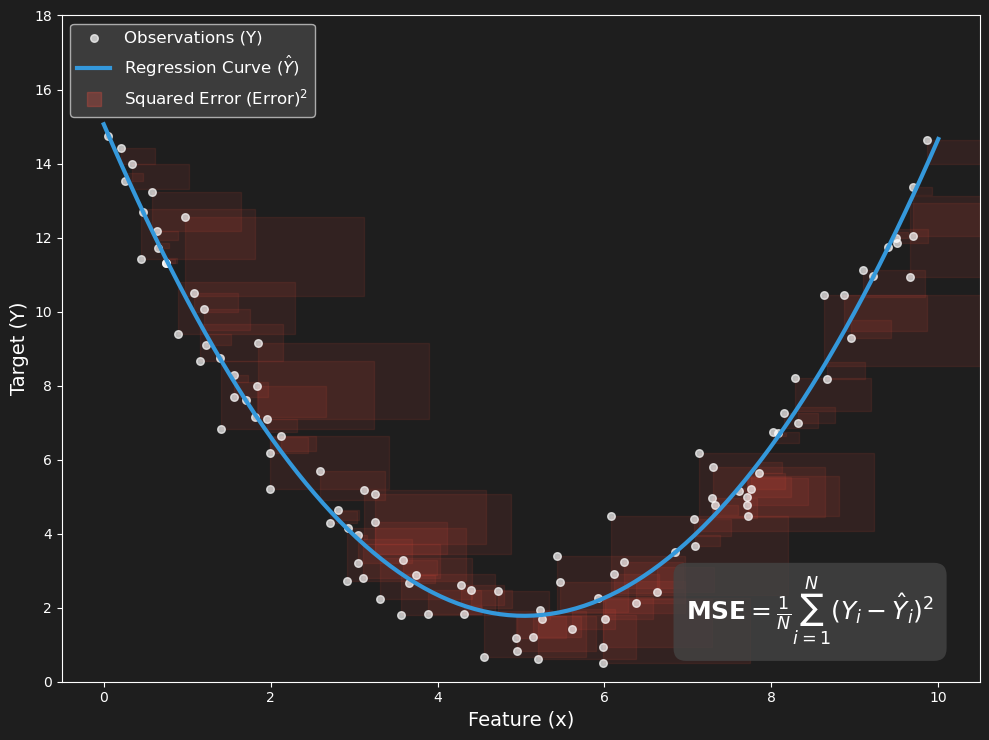

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle # Import for drawing squares

# --- 1. Generate Data (Reproduce from Cell 1) ---
np.random.seed(42) # MUST use the same seed
n_obs = 100
x_data = np.random.uniform(0, 10, n_obs)
epsilon = np.random.normal(0, 1.0, n_obs)
y_data = 0.5 * (x_data - 5)**2 + 2 + epsilon # y = f(x) + e

# --- 2. Fit the Regression Model (Reproduce from Cell 1) ---
coeffs = np.polyfit(x_data, y_data, 2)
p = np.poly1d(coeffs) # Create a polynomial function

y_pred = p(x_data)
residuals = y_data - y_pred # Need this for the squares
x_vals = np.linspace(0, 10, 100)
y_model = p(x_vals)

# ==================================================================
# --- PLOT 2: Visualizing Mean Squared Error (MSE) ---
# ==================================================================
fig, ax = plt.subplots(figsize=(10, 7.5))
fig.patch.set_facecolor('#1E1E1E')
ax.set_facecolor('#1E1E1E')

# Style axes
ax.set_xlim(-0.5, 10.5); ax.set_ylim(0, 18)
ax.set_xlabel("Feature (x)", color='white', fontsize=14)
ax.set_ylabel("Target (Y)", color='white', fontsize=14)
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')
# ax.set_title("Step 2: Visualizing MSE for a Non-Linear Model", color='white', fontsize=18, pad=20)

# Plot the 100 observations
ax.scatter(x_data, y_data, color='white', alpha=0.7, s=30, label='Observations (Y)', zorder=5)

# Plot the regression curve
ax.plot(x_vals, y_model, color='#3498DB', linewidth=3, label='Regression Curve ($\\hat{Y}$)', zorder=10)

# Plot the SQUARES of the errors
for i in range(n_obs):
    side_length = abs(residuals[i])
    # Anchor the square at the corner
    anchor_point = (x_data[i], min(y_data[i], y_pred[i]))

    square = Rectangle(anchor_point, side_length, side_length,
                       color='#E74C3C', alpha=0.1, zorder=3)
    ax.add_patch(square)

# Add a label for the squares (as a dummy plot)
ax.plot([], [], color='#E74C3C', marker='s', markersize=10,
         alpha=0.3, linestyle='None', label='Squared Error (Error)$^2$')

# Add the MSE formula
mse_text = r"$\mathbf{MSE} = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2$"
ax.text(0.95, 0.05, mse_text, transform=ax.transAxes,
         fontsize=18, color='white', ha='right', va='bottom',
         bbox=dict(boxstyle='round,pad=0.5', fc='#444444', ec='none', alpha=0.8))

ax.legend(loc='upper left', facecolor='#444444', labelcolor='white', fontsize=12)
plt.tight_layout()
plt.show()

# Conclusion